# Proyek Analisis Data: Bike Sharing Dataset

## Menentukan Pertanyaan Bisnis

1. Pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit ? <br>
2. Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ? <br>
3. Pada musim apa penyewaan sepeda paling banyak dan paling sedikit ? <br>
4. Bagaimana perbandingan data penyewaan Tahun 2011 dan 2012 ? <br>
5. Bagaimana perbandingan data penyewaan pelanggan Casual dan Registered ? <br>

## Import Semua Packages/Library yang Digunakan

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def check_outlier(df, column, verbose=True):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    minimum, maximum = q1 - cut_off, q3 + cut_off
    outliers = [True if x < minimum or x > maximum else False for x in df[column]]
    if verbose:
      if sum(outliers) > 0:
        print("{} ada data outlier, Minimum:{}, Maximum:{}".format(column.upper(), minimum, maximum))
        print("Jumlah data {} outlier: {}".format(column, sum(outliers)))
        sns.boxplot(x=df[column])
        plt.show()
        display(df[outliers])
        return outliers, maximum, minimum
      else:
        print("{} tidak ada data outlier, Minimum:{}, Maximum:{}".format(column.upper(), minimum, maximum))
    else:
      return outliers, maximum, minimum

## Data Wrangling

### Gathering Data

In [64]:
# Load data day.csv
df_day = pd.read_csv("./data/day.csv");
print("Dataframe Day")
display(df_day)

Dataframe Day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Terdapat 731 baris data pada dataframe day


In [65]:
# Load data hour.csv
print("Dataframe Hour")
df_hour= pd.read_csv("./data/hour.csv");
display(df_hour)

Dataframe Hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat 17379 data pada dataframe hour

### Assessing Data

#### Menilai Dataframe `df_day`

In [66]:
# Memeriksa info dataframe df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [67]:
# Memeriksa keberadaan missing value pada kolom - kolom
# dataframe df_day
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ada missing value

In [68]:
# Memeriksa keberadaan data duplikasi
# pada dataframe df_day
print("Jumlah duplikasi: ", df_day.drop('instant', axis=1).duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data

In [69]:
'''
 Memeriksa parameter statistik dari kolom - kolom dengan tipe data kuantatif
 Tidak mengikut sertakan kolom dengan tipe data kategorikal serta instant yang
 merupakan data id
'''
non_categorical_columns_day = [c for c in df_day.columns if c not in
                              ['instant', 'season', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday','hr', 'yr']]

print("Parameter Statistik Day")
display(df_day[non_categorical_columns_day].describe())

Parameter Statistik Day


,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Periksa OUTLIER di dataframe day

TEMP tidak ada data outlier, Minimum:-0.14041600000000015, Maximum:1.1329160000000003

ATEMP tidak ada data outlier, Minimum:-0.06829675000000018, Maximum:1.0147412500000002

HUM ada data outlier, Minimum:0.20468725, Maximum:1.0455212500000002
Jumlah data hum outlier: 2


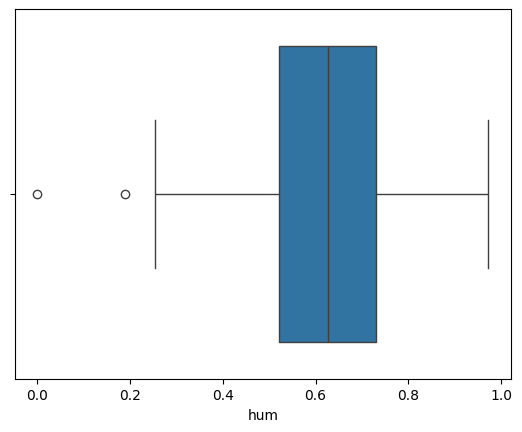

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623



WINDSPEED ada data outlier, Minimum:-0.012446750000000034, Maximum:0.38061125
Jumlah data windspeed outlier: 13


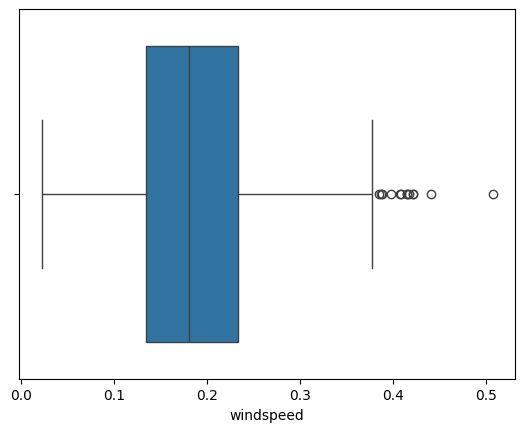

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569


In [70]:
# Memeriksa keberadaan outlier pada kolom dataframe day

print("Periksa OUTLIER di dataframe day")
print()
check_outlier(df_day, 'temp')
print()
check_outlier(df_day, 'atemp')
print()
check_outlier(df_day, 'hum')
print()
check_outlier(df_day, 'windspeed')
print()

**Insight:**
- Terdapat outlier pada fitur windspeed
- Terdapat INCORRECT VALUE, menurut literatur HUMIDITY tidak mungkin bernilai 0, maka dari untuk selanjutnya itu HUMIDITY yang bernilai 0 akan diberi nilai minimum dari hasil penghtiungan IQR


#### Menilai dataframe `df_hour`

In [71]:
# Memeriksa info dataframe df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [72]:
# Memeriksa keberadaan missing value pada kolom - kolom
# dataframe df_hour
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada missing value

In [73]:
# Memeriksa keberadaan data duplikasi
# pada dataframe df_hour
print("Jumlah duplikasi: ", df_hour.drop('instant', axis=1).duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data

In [74]:
# Memeriksa apakah setiap hari terdapat data selama 24 jam (0 - 23)
df_hour.groupby('dteday').count()['hr'].loc[lambda x: x < 23]

,hr
dteday,
2011-01-03,22
2011-01-11,22
2011-01-12,22
2011-01-18,12
2011-01-26,16
2011-01-27,8
2011-02-11,22
2011-02-22,18
2011-02-28,22


**Insight:**
- Terdapat 14 hari (lihat tabel di atas) yang memiliki kurang dari 23 data yang menunjukkan data tiap jam

In [75]:
'''
 Memeriksa parameter statistik dari kolom - kolom dengan tipe data kuantatif
 Tidak mengikut sertakan kolom dengan tipe data kategorikal serta instant yang
 merupakan data id
'''

non_categorical_columns_hour = [c for c in df_hour.columns if c not in
                               ['instant', 'season', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday', 'hr','yr']]


print()
print("Parameter Statistik Hour")
display(df_hour[non_categorical_columns_hour].describe())


Parameter Statistik Hour


,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Periksa OUTLIER di dataframe hour

TEMP tidak ada data outlier, Minimum:-0.13999999999999996, Maximum:1.1400000000000001

ATEMP tidak ada data outlier, Minimum:-0.09854999999999997, Maximum:1.0530499999999998

HUM ada data outlier, Minimum:0.029999999999999916, Maximum:1.23
Jumlah data hum outlier: 22


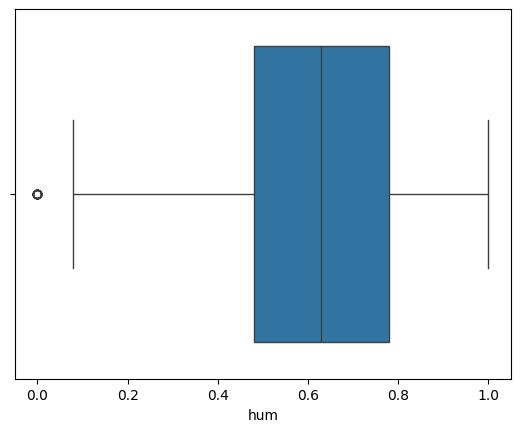

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11



WINDSPEED ada data outlier, Minimum:-0.1193, Maximum:0.4775
Jumlah data windspeed outlier: 342


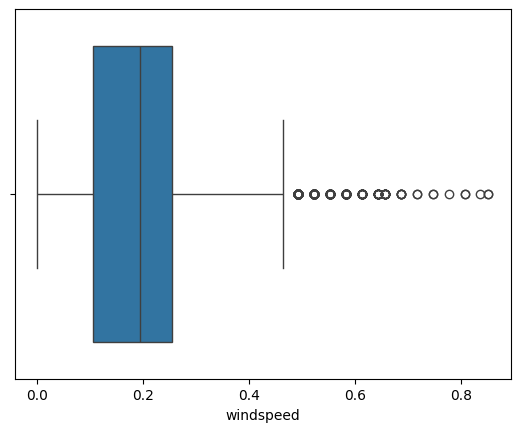

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
175,176,2011-01-08,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,12,83,95
178,179,2011-01-08,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,5,64,69
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144


In [76]:
# Memeriksa keberadaan outlier pada kolom dataframe day

print("Periksa OUTLIER di dataframe hour")
print()
check_outlier(df_hour, 'temp')
print()
check_outlier(df_hour, 'atemp')
print()
check_outlier(df_hour, 'hum')
print()
check_outlier(df_hour, 'windspeed')
print()


**Insight:**
* Terdapat outlier pada HUMIDITY dan WINDSPEED
* Terdapat INCORRECT VALUE, menurut literatur HUMIDITY tidak mungkin bernilai 0, maka dari untuk selanjutnya itu HUMIDITY yang bernilai 0 akan diberi nilai minimum dari hasil penghtiungan IQR


### Cleaning Data

#### Memperbaiki `df_hour`

In [77]:
# Ganti nilai outlier
df_day_clean = df_day.copy()
outliers, maximum, minimum = check_outlier(df_day_clean, "hum", verbose=False)
df_day_clean.loc[df_day_clean["hum"] < minimum, "hum"] = minimum
df_day_clean.loc[df_day_clean["hum"] > maximum, "hum"] = maximum

outliers, maximum, minimum = check_outlier(df_day_clean, "windspeed", verbose=False)
df_day_clean.loc[df_day_clean["windspeed"] < minimum, "windspeed"] = minimum
df_day_clean.loc[df_day_clean["windspeed"] > maximum, "windspeed"] = maximum

In [78]:
# Ganti tipe dtime ke date_time
df_day_clean['dteday'] = pd.to_datetime(df_day_clean['dteday'])

In [79]:
# Ganti tipe data categorical numeric menjadi nilai aslinya
df_day_clean['season'] = df_day_clean['season'].astype('category')
df_day_clean['mnth'] = df_day_clean['mnth'].astype('category')
df_day_clean['holiday'] = df_day_clean['holiday'].astype('category')
df_day_clean['weekday'] = df_day_clean['weekday'].astype('category')
df_day_clean['weathersit'] = df_day_clean['weathersit'].astype('category')
df_day_clean['workingday'] = df_day_clean['workingday'].astype('category')
df_day_clean['yr'] = df_day_clean['yr'].astype('category')

df_day_clean["weekday"] = df_day_clean["weekday"].cat.rename_categories({0:"Sunday",
                                                                       1:"Monday",
                                                                       2:"Tuesday",
                                                                       3:"Wednesday",
                                                                       4:"Thursday",
                                                                       5:"Friday",
                                                                       6:"Saturday"}
                                                                      )

df_day_clean["season"] = df_day_clean["season"].cat.rename_categories({1:"Springer",
                                                                       2:"Summer",
                                                                       3:"Fall",
                                                                       4:"Winter"})

df_day_clean["mnth"] = df_day_clean["mnth"].cat.rename_categories({1:"January", 2:"February", 3:"March", 4:"April",
                                                                   5:"May", 6:"June", 7:"July", 8:"August", 9:"September",
                                                                   10:"October", 11:"November", 12:"December"})

df_day_clean["weathersit"] = df_day_clean['weathersit'].cat.rename_categories({1:"Clear, Few clouds, Partly cloudy, Partly cloudy",
                                                                              2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                                                                              3:"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                                                              4:"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})

df_day_clean["yr"] = df_day_clean['yr'].cat.rename_categories({0:"2011", 1:"2012"})
df_day_clean["holiday"] = df_day_clean['holiday'].cat.rename_categories({0:"No", 1:"Yes"})
df_day_clean["workingday"] = df_day_clean['workingday'].cat.rename_categories({0:"No", 1:"Yes"})

display(df_day_clean.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,No,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,No,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [80]:
# Ganti nilai yang telah di normalisasi ke nilai aslinya
df_day_clean.temp = df_day_clean.temp * (39 -(-8)) + (-8)
df_day_clean.atemp = df_day_clean.atemp * (50 -(-16)) + (-16)
df_day_clean.hum = df_day_clean.hum * 100
df_day_clean.windspeed = df_day_clean.windspeed * 67

df_hour_clean.temp = df_hour_clean.temp * (39 -(-8)) + (-8)
df_hour_clean.atemp = df_hour_clean.atemp * (50 -(-16)) + (-16)
df_hour_clean.hum = df_hour_clean.hum * 100
df_hour_clean.windspeed = df_hour_clean.windspeed * 67

display(df_day_clean.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,January,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,January,No,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,January,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,January,No,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.666979,-0.868180,43.6957,12.522300,82,1518,1600


#### Memperbaiki `df_hour`

In [81]:
# Ganti nilai outlier
df_hour_clean = df_hour.copy()
outliers, maximum, minimum = check_outlier(df_hour_clean, "hum", verbose=False)
df_day_clean.loc[df_day_clean["hum"] < minimum, "hum"] = minimum
df_day_clean.loc[df_day_clean["hum"] > maximum, "hum"] = maximum

In [82]:
# Ganti tipe dtime ke date_time
df_hour_clean['dteday'] = pd.to_datetime(df_hour_clean['dteday'])

In [83]:
# Ganti tipe data categorical numeric menjadi nilai aslinya
df_hour_clean['season'] = df_hour_clean['season'].astype('category')
df_hour_clean['mnth'] = df_hour_clean['mnth'].astype('category')
df_hour_clean['holiday'] = df_hour_clean['holiday'].astype('category')
df_hour_clean['weekday'] = df_hour_clean['weekday'].astype('category')
df_hour_clean['weathersit'] = df_hour_clean['weathersit'].astype('category')
df_hour_clean['workingday'] = df_hour_clean['workingday'].astype('category')
df_hour_clean['yr'] = df_hour_clean['yr'].astype('category')

df_hour_clean["weekday"] = df_hour_clean["weekday"].cat.rename_categories({0:"Sunday",
                                                                       1:"Monday",
                                                                       2:"Tuesday",
                                                                       3:"Wednesday",
                                                                       4:"Thursday",
                                                                       5:"Friday",
                                                                       6:"Saturday"}
                                                                      )
df_hour_clean["season"] = df_hour_clean["season"].cat.rename_categories({1:"Springer",
                                                                       2:"Summer",
                                                                       3:"Fall",
                                                                       4:"Winter"})

df_hour_clean["mnth"] = df_hour_clean["mnth"].cat.rename_categories({1:"January", 2:"February", 3:"March", 4:"April",
                                                                   5:"May", 6:"June", 7:"July", 8:"August", 9:"September",
                                                                   10:"October", 11:"November", 12:"December"})

df_hour_clean["weathersit"] = df_hour_clean['weathersit'].cat.rename_categories({1:"Clear, Few clouds, Partly cloudy, Partly cloudy",
                                                                              2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                                                                              3:"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                                                              4:"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})

df_hour_clean["yr"] = df_hour_clean['yr'].cat.rename_categories({0:"2011", 1:"2012"})
df_hour_clean["holiday"] = df_hour_clean['holiday'].cat.rename_categories({0:"No", 1:"Yes"})
df_hour_clean["workingday"] = df_hour_clean['workingday'].cat.rename_categories({0:"No", 1:"Yes"})

display(df_hour_clean.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,No,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

#### EDA `df_day`

In [84]:
# Deskripsi df_day
display(df_day_clean.describe())

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,15.283085,15.307363,1.230000e+00,12.719667,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,-5.220871,-10.781406,1.230000e+00,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,7.842925,6.297605,1.230000e+00,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,15.421651,16.124378,1.230000e+00,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,22.804575,24.167732,1.230000e+00,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,32.498349,39.499136,1.230000e+00,25.500954,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,8.603397,10.755438,1.177642e-14,5.068137,686.622488,1560.256377,1937.211452


In [85]:
# Melihat jumlah penyewaan sepeda berdasarkan hari
display(df_day_clean.groupby('weekday', observed=True).agg(
    {"cnt": ["max", "min", "mean", "std"]}
))

cnt                                
            max   min         mean          std
weekday                                        
Sunday     8227   605  4228.828571  1872.496629
Monday     7525    22  4338.123810  1793.074013
Tuesday    7767   683  4510.663462  1826.911642
Wednesday  8173   441  4548.538462  2038.095884
Thursday   7804   431  4667.259615  1939.433317
Friday     8362  1167  4690.288462  1874.624870
Saturday   8714   627  4550.542857  2196.693009

In [86]:
# Melihat jumlah penyewaan sepeda berdasarkan cuaca tiap harinya
display(df_day_clean.groupby('weathersit', observed=True).agg(
    {"cnt": ["max", "min", "mean", "std"]}
))

cnt                    \
                                                     max  min         mean   
weathersit                                                                   
Clear, Few clouds, Partly cloudy, Partly cloudy     8714  431  4876.786177   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  8362  605  4035.862348   
Light Snow, Light Rain + Thunderstorm + Scatter...  4639   22  1803.285714   

                                                                 
                                                            std  
weathersit                                                       
Clear, Few clouds, Partly cloudy, Partly cloudy     1879.483989  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  1809.109918  
Light Snow, Light Rain + Thunderstorm + Scatter...  1240.284449

In [87]:
# Melihat jumlah penyewaan sepeda berdasarkan tahun tiap harinya
display(df_day_clean.groupby('yr', observed=True).agg(
    {"cnt": ["max", "min", "mean", "std"]}
))

cnt                               
       max  min         mean          std
yr                                       
2011  6043  431  3405.761644  1378.753666
2012  8714   22  5599.934426  1788.667868

#### EDA `df_hour`

In [88]:
# Deskripsi df_hour
display(df_hour_clean.describe())

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [89]:
# Melihat jumlah penyewaan sepeda berdasarkan hari
display(df_hour_clean.groupby('hr', observed=True).agg(
    {"cnt": ["max", "min", "mean", "std"]}
))

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

**Insight :** <br>
Berdasarkan rata - rata, jumlah penyewaan terbanyak berdada pada jam 17. Terlihat juga pola dimana pada jam 8 terjadi lonjakan penyewa dan jam 17 juga terjadi lonjakan penyewa sepeda. Asumsinya adalah penyewa merupakan pekerja kantor yang pergi jam 8 dan pulang jam 17.

In [90]:
# Melihat jumlah penyewaan sepeda berdasarkan musim
display(df_day_clean.groupby('season', observed=True).agg(
    {"season" : ["count"],
     "cnt": ["max", "min", "mean", "std"],
     "atemp": ["max", "min", "mean", "std"],
     "hum": ["max", "min", "mean", "std"],
     "windspeed": ["max", "min", "mean", "std"]}
))

season   cnt                                      atemp             \
          count   max   min         mean          std        max        min   
season                                                                        
Springer    181  7836   431  2604.132597  1399.942119  20.208722 -10.781406   
Summer      184  8362   795  4992.331522  1695.977235  34.000214   0.522374   
Fall        188  8714  1115  5644.303191  1459.800381  39.499136  -0.001600   
Winter      178  8555    22  4728.162921  1699.615261  24.126350  -0.957742   

                                hum                   windspeed            \
               mean       std   max   min  mean  std        max       min   
season                                                                      
Springer   3.596320  6.535692  1.23  1.23  1.23  0.0  25.500954  3.042356   
Summer    18.340284  7.129446  1.23  1.23  1.23  0.0  25.500954  4.417256   
Fall      27.289294  4.755700  1.23  1.23  1.23  0.0  25.166339  4.292744   
Winter    11.425557  6.305355  1.23  1.23  1.23  0.0  25.500954  1.500244   

                               
               mean       std  
season                         
Springer  14.229444  5.442116  
Summer    13.628196  4.781914  
Fall      11.530366  3.988275  
Winter    11.501406  5.402528

**Insight**:
- Rata - rata penyewa paling banyak terdapat pada musim gugur
- Rata - rata penyewa paling sedikit adalah pada musim springer
- Rata - rata jumlah penyewa yang sangat jauh antara musim springer dengan musim lainnya dapat disebabkan oleh pengaruh rata - rata suhu yang lebih dingin pada musim springer

In [91]:
# Melihat jumlah penyewaan sepeda berdasarkan cuaca tiap jamnya
display(df_hour_clean.groupby('weathersit', observed=True).agg(
    {"cnt": ["max", "min", "mean", "std"]}
))

cnt                  \
                                                    max min        mean   
weathersit                                                                
Clear, Few clouds, Partly cloudy, Partly cloudy     977   1  204.869272   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  957   1  175.165493   
Light Snow, Light Rain + Thunderstorm + Scatter...  891   1  111.579281   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...  164  23   74.333333   

                                                                
                                                           std  
weathersit                                                      
Clear, Few clouds, Partly cloudy, Partly cloudy     189.487773  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  165.431589  
Light Snow, Light Rain + Thunderstorm + Scatter...  133.781045  
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   77.925178

In [92]:
# Melihat jumlah penyewaan sepeda berdasarkan tahun tiap jamnya
display(df_hour_clean.groupby('yr', observed=True).agg(
    {"cnt": ["max", "min", "mean", "std"]}
))

cnt                            
      max min        mean         std
yr                                   
2011  651   1  143.794448  133.797854
2012  977   1  234.666361  208.910941

### Explore Correlation

In [93]:
print("Korelasi dataframe day")
display(df_day_clean.drop("instant", axis=1).corr(numeric_only = True))
print()
print("===========================")
print()
print("Korelasi dataframe hour")
display(df_hour_clean.drop("instant", axis=1).corr(numeric_only = True))

Korelasi dataframe day


,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,NaN,-0.156916,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,NaN,-0.182948,0.543864,0.544192,0.631066
hum,NaN,NaN,NaN,NaN,NaN,NaN,NaN
windspeed,-0.156916,-0.182948,NaN,1.000000,-0.166295,-0.216927,-0.233657
casual,0.543285,0.543864,NaN,-0.166295,1.000000,0.395282,0.672804
registered,0.540012,0.544192,NaN,-0.216927,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,NaN,-0.233657,0.672804,0.945517,1.000000




Korelasi dataframe hour


,hr,temp,atemp,hum,windspeed,casual,registered,cnt
hr,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
temp,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


**Keterangan :**
Terdapat korelasi yang kuat pada dataframe day antara jumlah penyewa dengan :
1. dteday (tanggal) -> 0.629
2. yr (tahun) -> 0.5667
3. temp (suhu) -> 0.627494
4. atemp (suhu yang dirasakan) -> 0.631066
5. casual (penyewa casual) -> 0.673804
6. registered (penyewa terdaftar/member) -> 0.945517

### Data Distribution

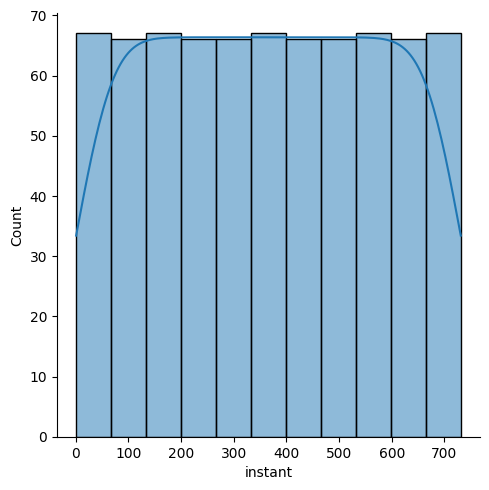

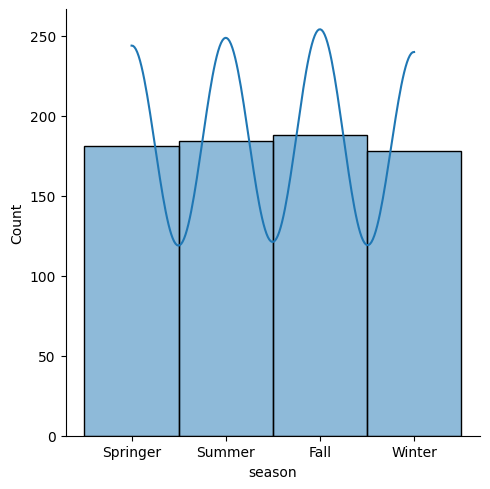

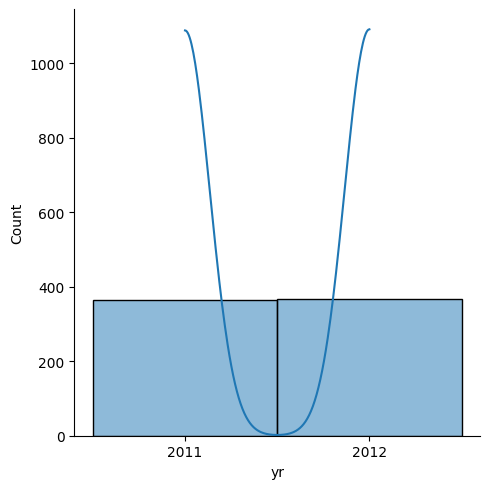

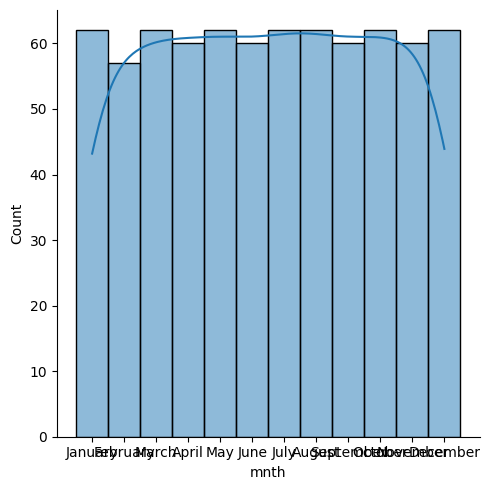

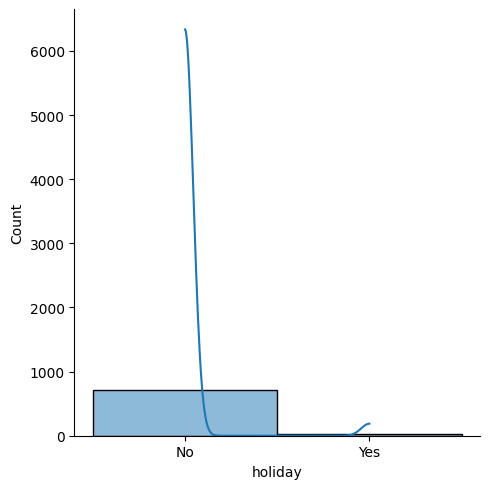

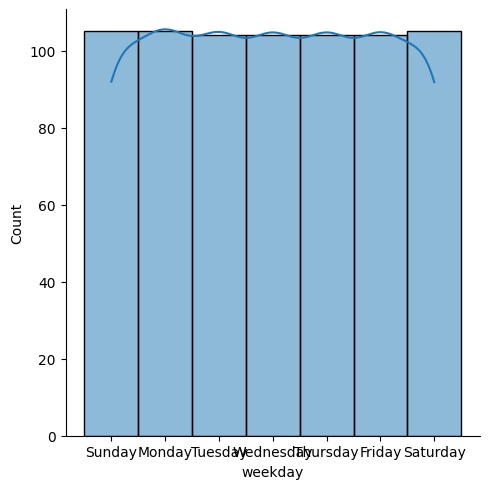

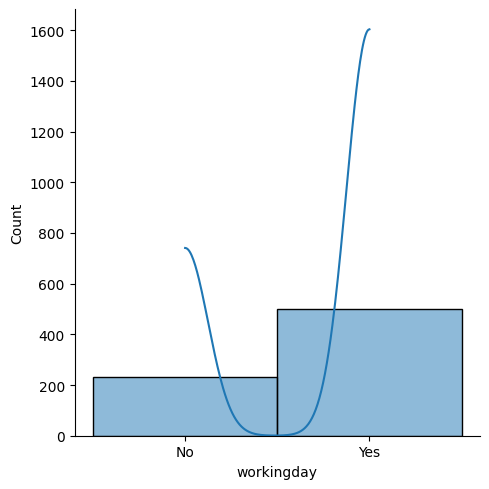

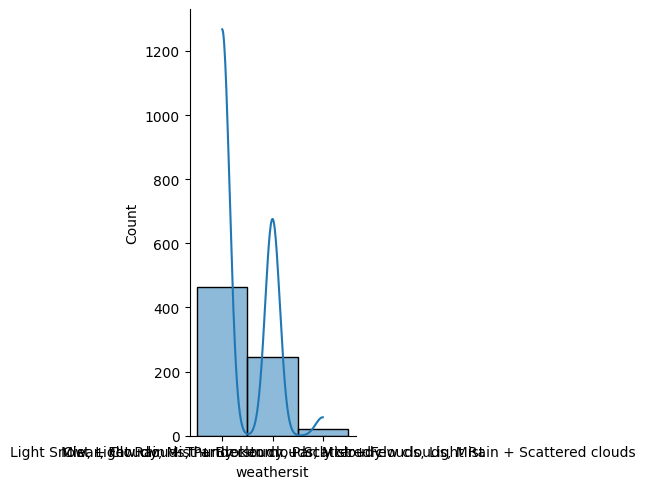

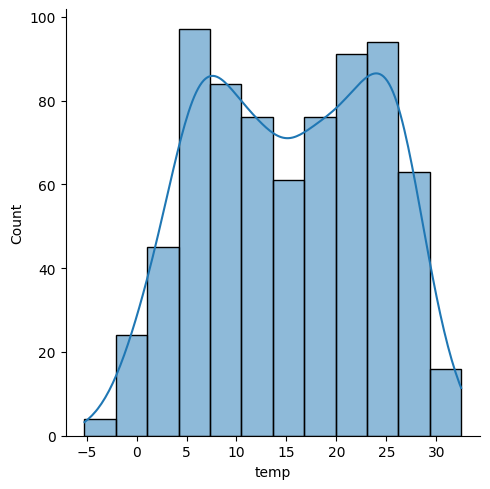

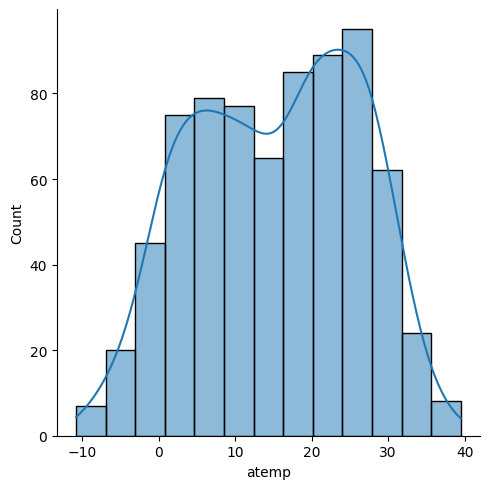

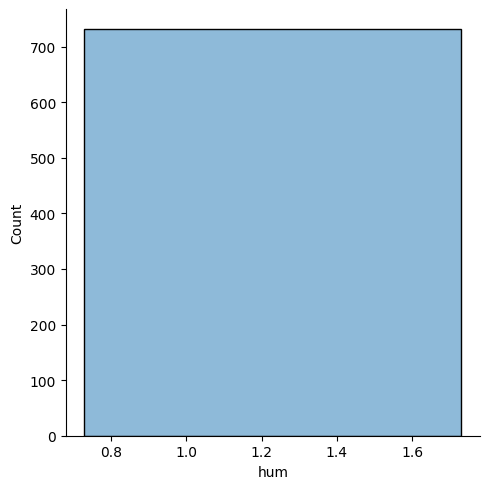

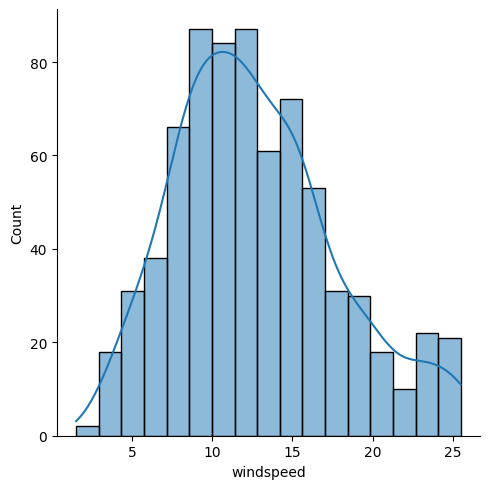

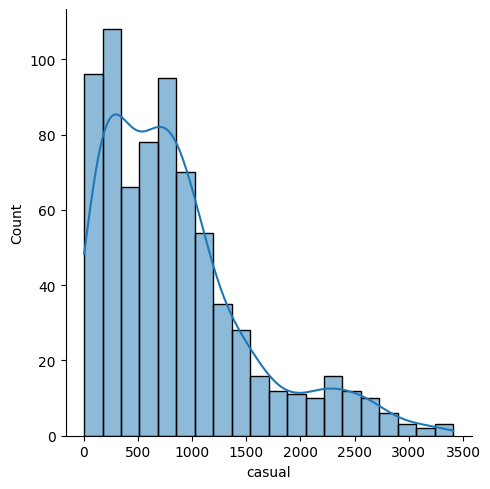

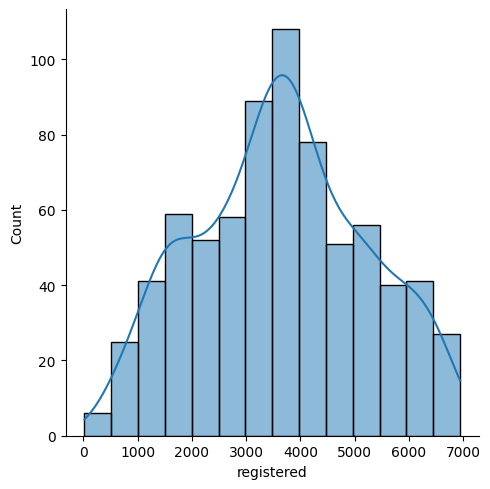

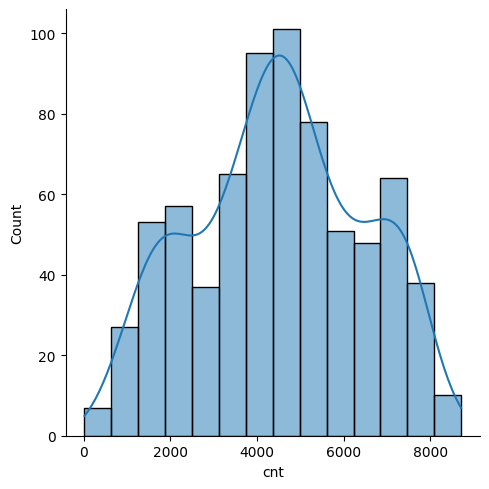

In [94]:
for col_id in df_day_clean.drop("dteday", axis=1).columns:
    sns.displot(df_day_clean[col_id], kde=True)
    plt.show()

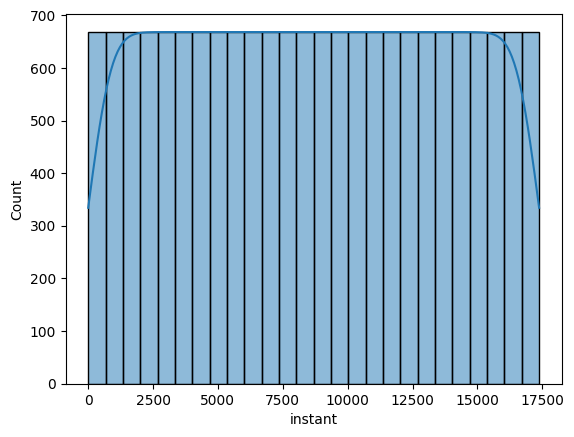

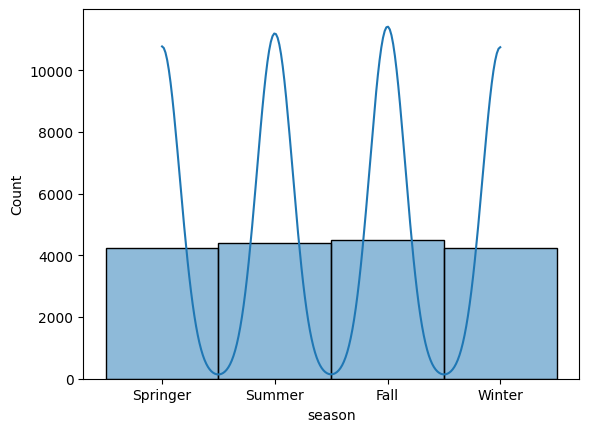

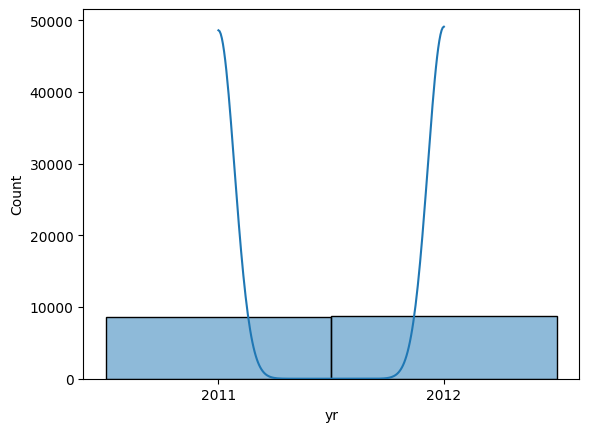

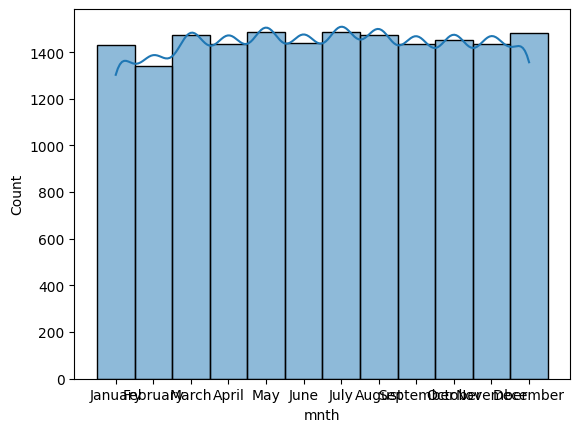

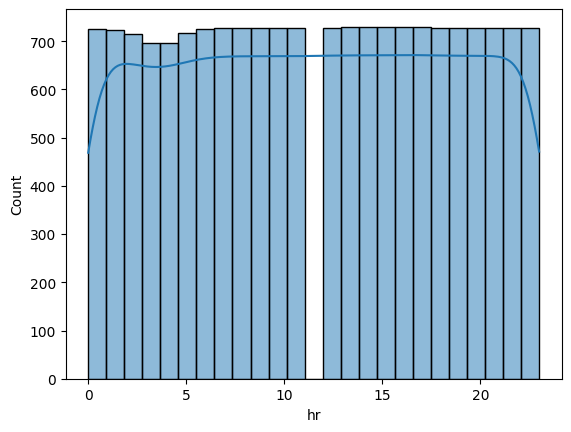

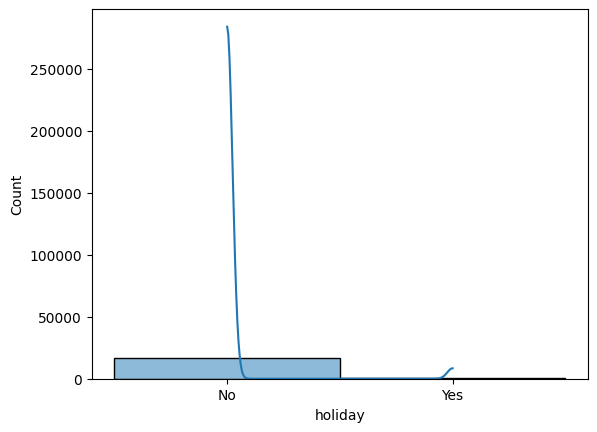

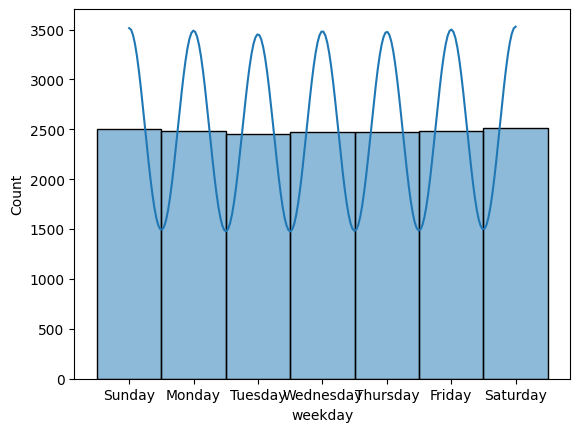

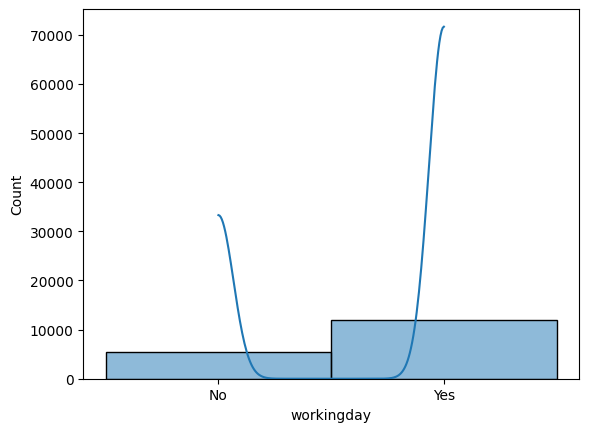

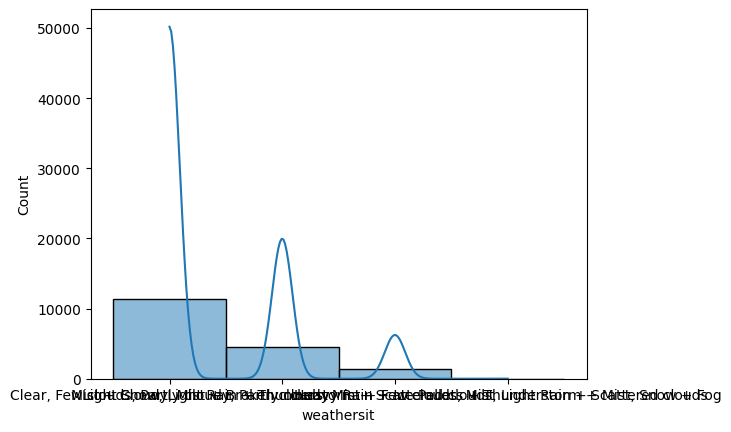

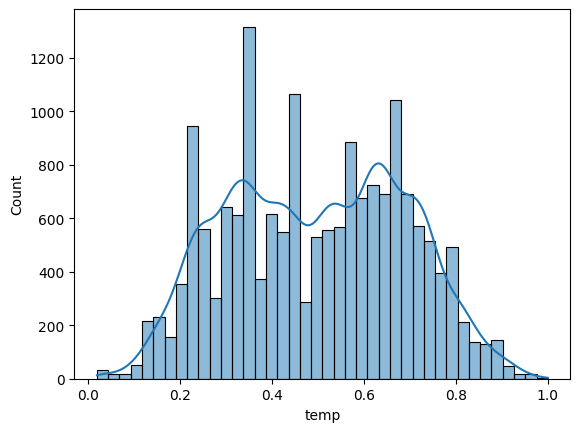

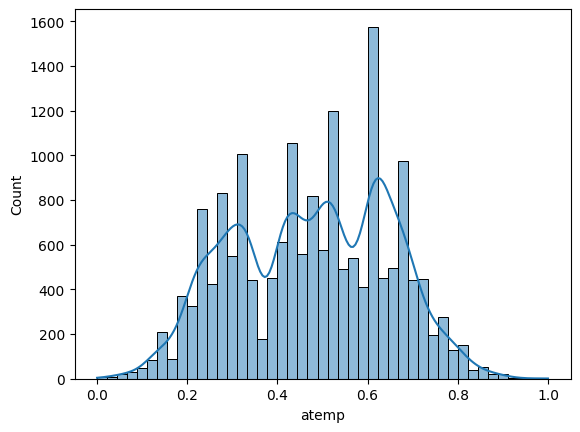

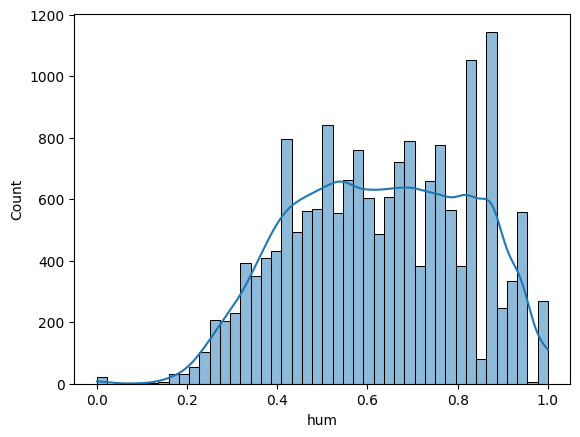

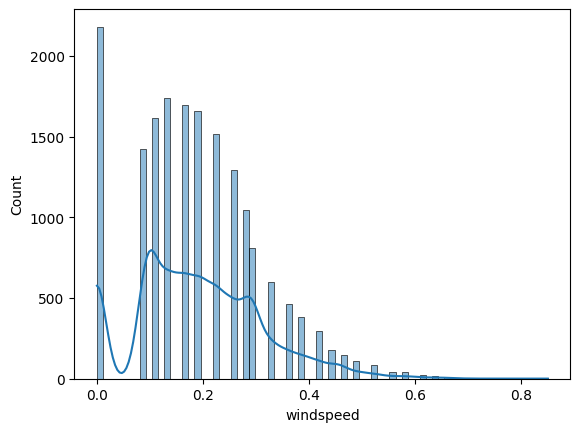

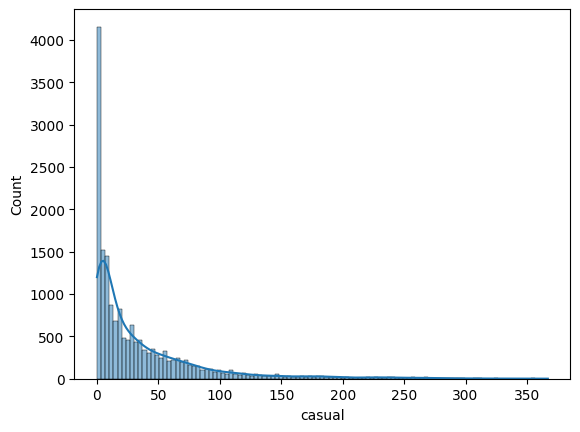

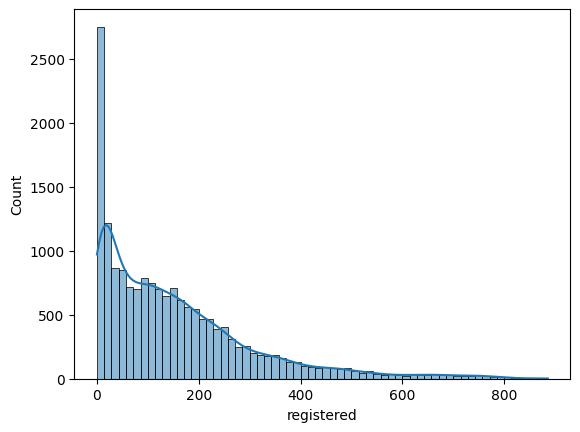

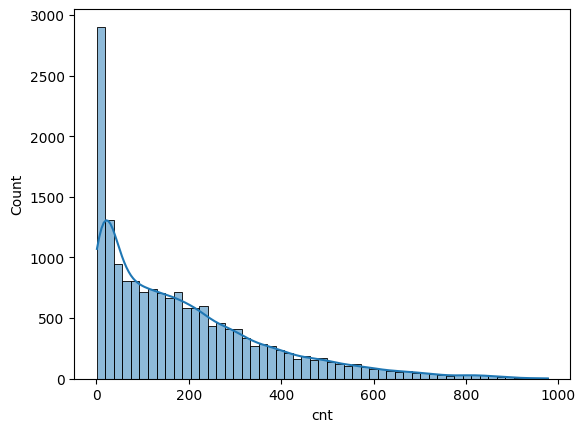

In [95]:
for col_id in df_hour_clean.drop("dteday", axis=1).columns:
    sns.histplot(df_hour_clean[col_id], kde=True)
    plt.show()

## Visualization & Explanatory Analysis
1. Pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit ? <br>
2. Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ? <br>
3. Pada musim apa penyewaan sepeda paling banyak dan paling sedikit ? <br>
4. Bagaimana kondisi cuaca, temperatur, kelembapan, dan kecepetan angin mempengaruhi penyewaan sepeda? <br>
5. Bagaimana perbandingan data penyewaan Tahun 2011 dan 2012 ? <br>
6. Bagaimana perbandingan data penyewaan pelanggan Casual dan Registered ? <br>

### Pertanyaan 1: Pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit ? ✓

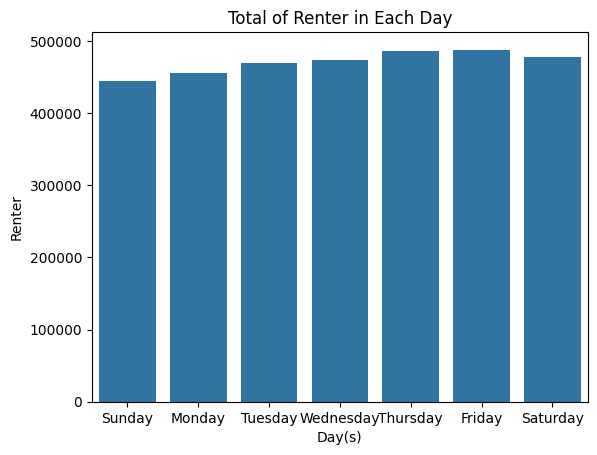

In [96]:
from matplotlib.pyplot import figure

plt.xlabel("Day(s)")
plt.ylabel("Renter")
plt.title("Total of Renter in Each Day")
sns.barplot(df_day_clean.groupby(by="weekday", observed=False)['cnt'].sum().sort_values(ascending=False))
plt.show()

**Insight :** <br>
Hari dengan jumlah penyewa terbanyak adalah hari Jumat, Dimana jumlah penyewa yang paling sedikit adalah hari Minggu. Kemungkinan hari minggu digunakan sebagai hari beristirahat sehingga orang - orang tidak melakukan aktifitas diluar ruangan. Sementara pada hari Jumat merupakan hari terakhir bekerja sebelum libur pada sabtunya, terjadinya puncak jumlah penyewaan sepeda dapat disebabkan bercampurnya penyewa sepeda untuk keperluan mobilitas bekerja dengan penyewa sepeda untuk berwisata.</p>

### Pertanyaan 2: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ? ✓

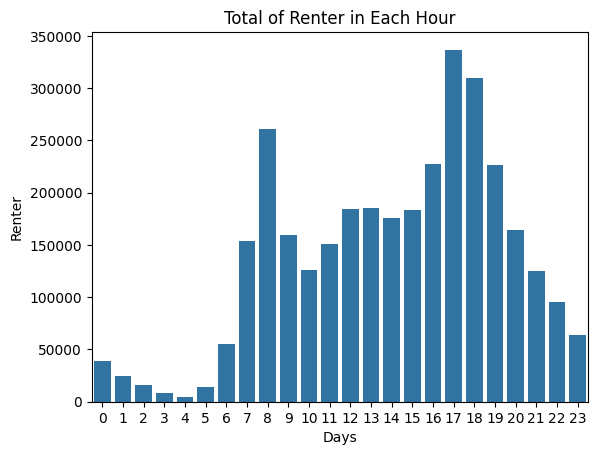

In [97]:
plt.xlabel("Days")
plt.ylabel("Renter")
plt.title("Total of Renter in Each Hour")
sns.barplot(df_hour_clean.groupby(by="hr", observed=False)['cnt'].sum().sort_values(ascending=False))
plt.show()

**Insight:**

- Berdasarkan jam, Pukul 5 sore merupakan waktu jumlah penyewaan terbanyak sedangkan Pukul 4 pagi merupakan jumlah penyewaan paling sedikit.
- Terjadinya lonjakan penyewaan pada Pukul 8 pagi dapat disebabkan karena kebutuhan orang untuk mobilitas berangkat kerja dimana kemungkinan masuk kerja pada Pukul 9.
- Sedangkan Pukul 5 sore diduga merupakan waktu bercampurnya penyewa untuk keperluan mobilitas dalam bekerja dan penyewa untuk keperluan rekreasi.
- Di lain hal setelah pukul 5 sore jumlah penyewa konsisten menurun hingga pukul 4 pagi.

### Pertanyaan 3: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit ? ✓

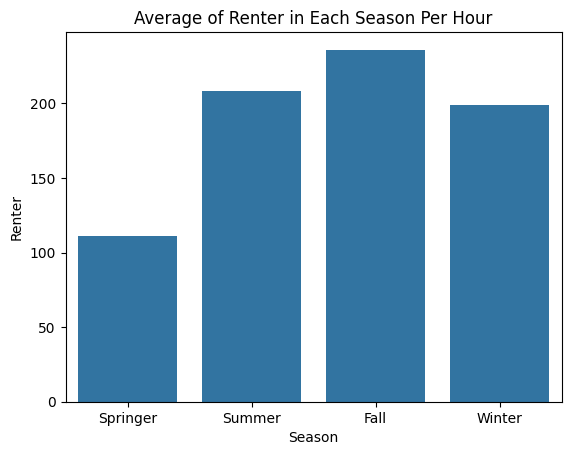

In [98]:
plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean.groupby(by="season", observed=False)['cnt'].mean())
plt.show()

**Insight**: <br>
Jumlah penyewaan rata - rata paling sedikit terjadi pada musim Springer dan paling banyak pada Fall

### Pertanyaan 4: Bagaimana perbandingan data penyewaan Tahun 2011 dan 2012 ? ✓

<Axes: title={'center': 'Average of Renter 2011 vs 2012'}, xlabel='Season', ylabel='Renter'>

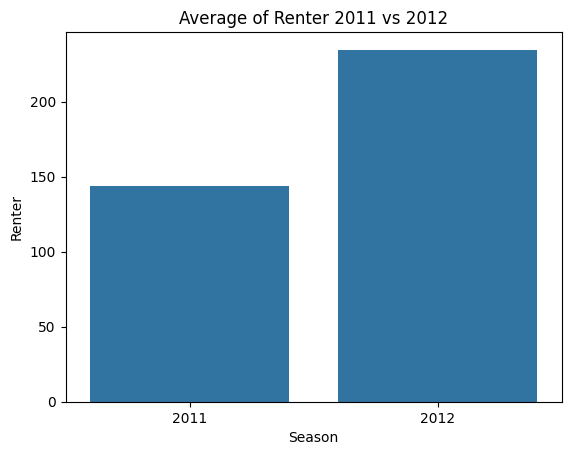

In [99]:
plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter 2011 vs 2012")
sns.barplot(df_hour_clean.groupby(by="yr", observed=False)['cnt'].mean())

**Insight:**

Terjadi peningkatan jumlah penyewaan yang signifikan pada tahun 2011 ke tahun 2012.

### Pertanyaan 5: Bagaimana perbandingan data penyewaan pelanggan Casual dan Registered ?  ✓

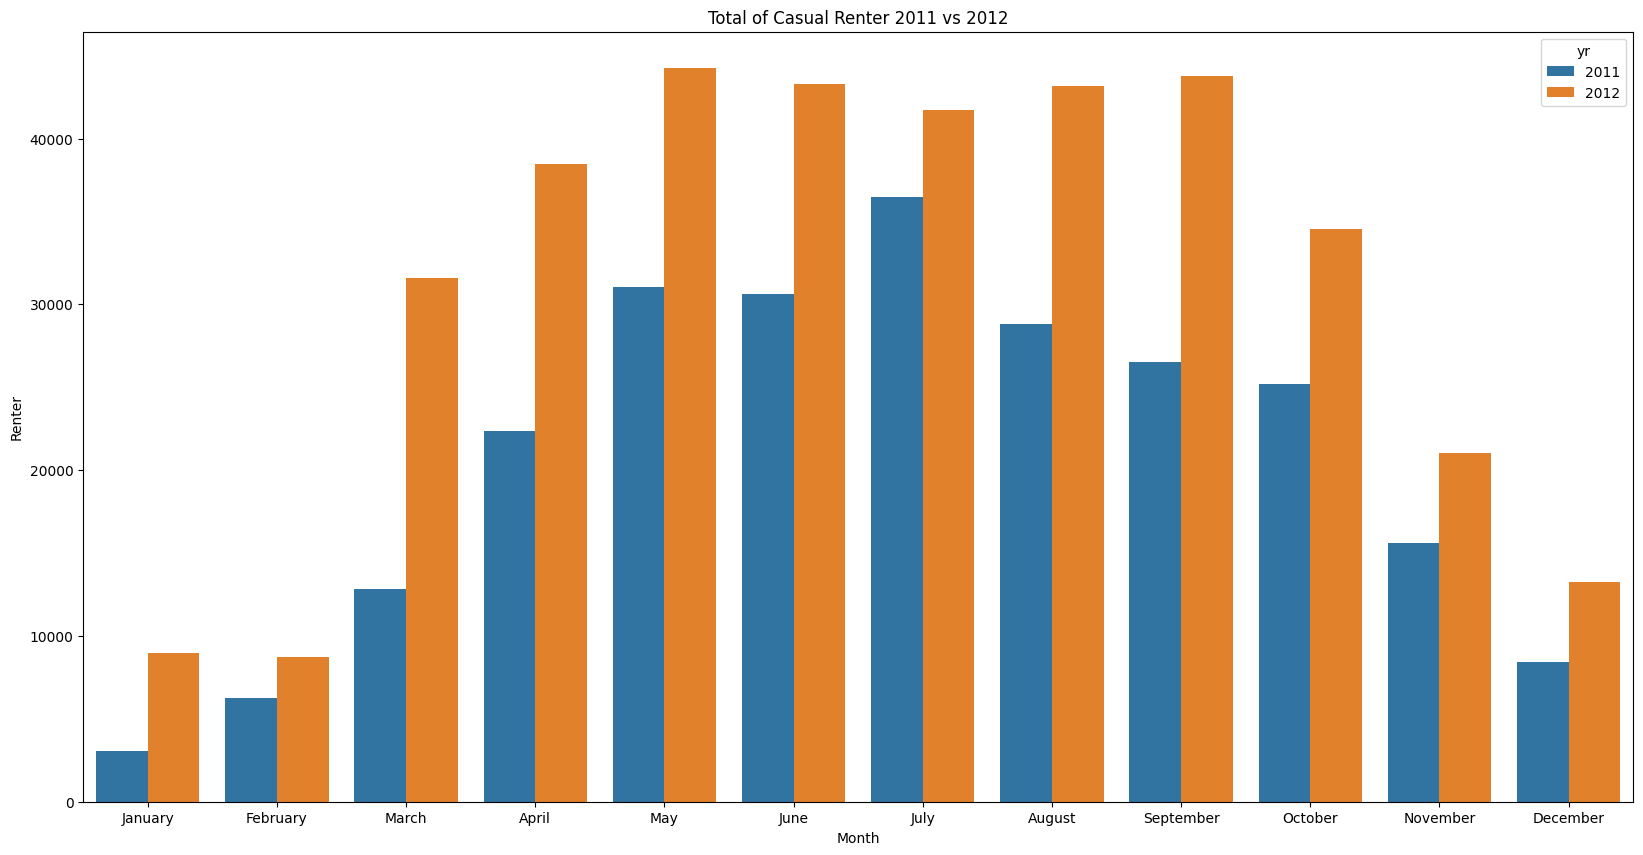

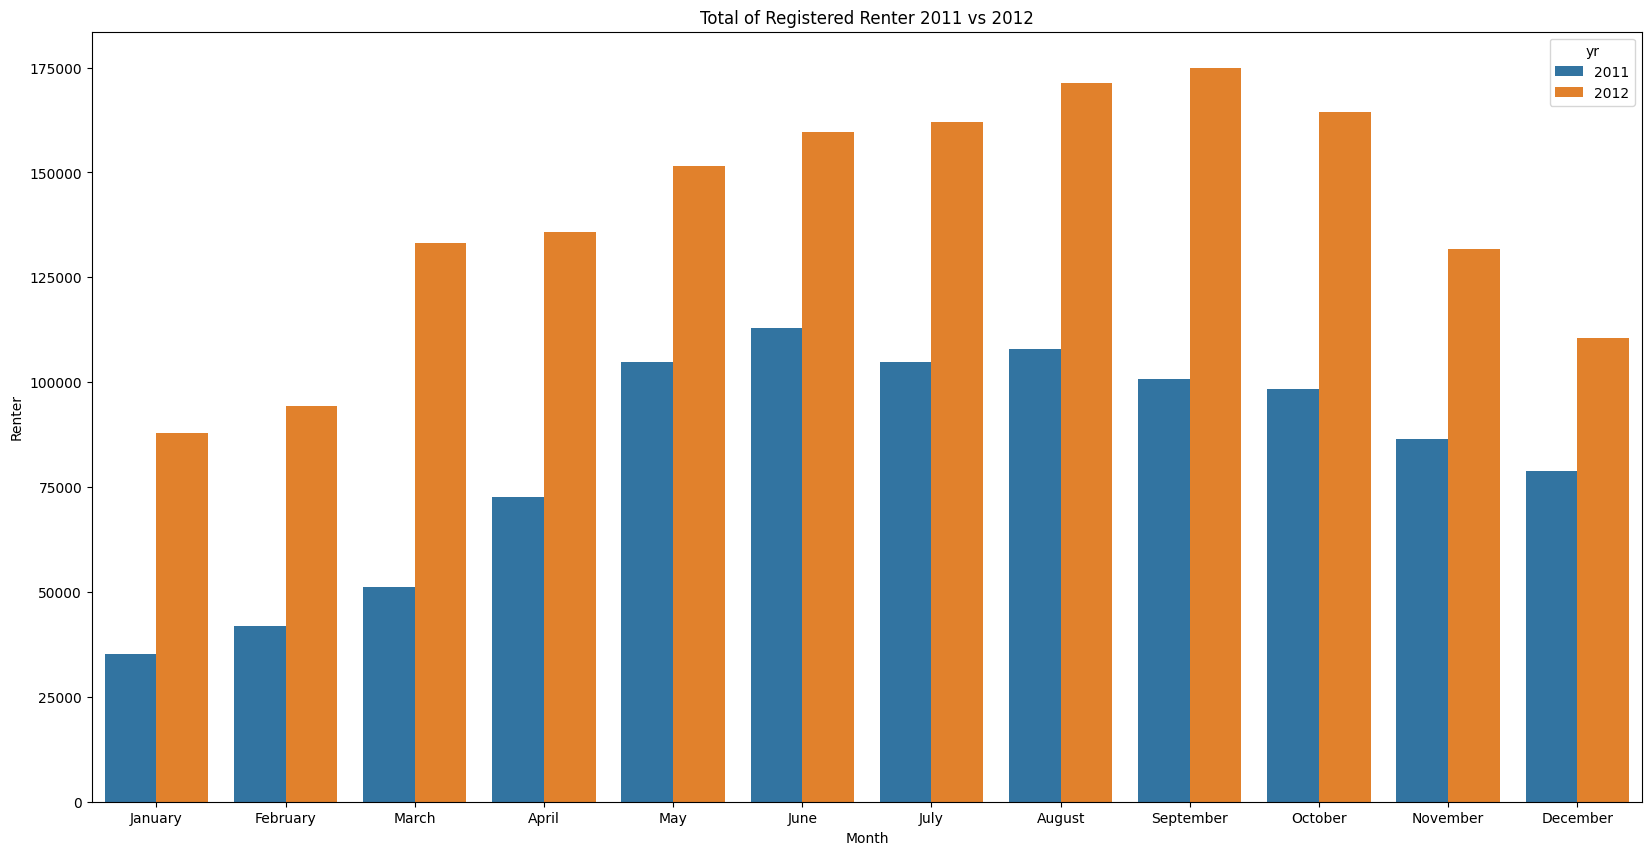

In [100]:
plt.figure(figsize=(20, 10))
plt.xlabel("Month")
plt.ylabel("Renter")
plt.title("Total of Casual Renter 2011 vs 2012")
sns.barplot(df_day_clean.groupby(by=["mnth", "yr"],
                                 observed=False)['casual'].sum().reset_index(),
            x="mnth", y="casual", hue="yr")
plt.show()

plt.figure(figsize=(20, 10))
plt.xlabel("Month")
plt.ylabel("Renter")
plt.title("Total of Registered Renter 2011 vs 2012")
sns.barplot(df_day_clean.groupby(by=["mnth", "yr"],
                                 observed=False)['registered'].sum().reset_index(),
            x="mnth", y="registered", hue="yr")
plt.show()

**Insight:** <br>
Jumlah penyewa yang terdaftar konsisten lebih banyak daripada jumlah penyewa casual. Hal ini menunjukkan banyaknya orang yang rutin menyewa sepeda dimana diduga untuk keperluan mobilitas pekerjaan

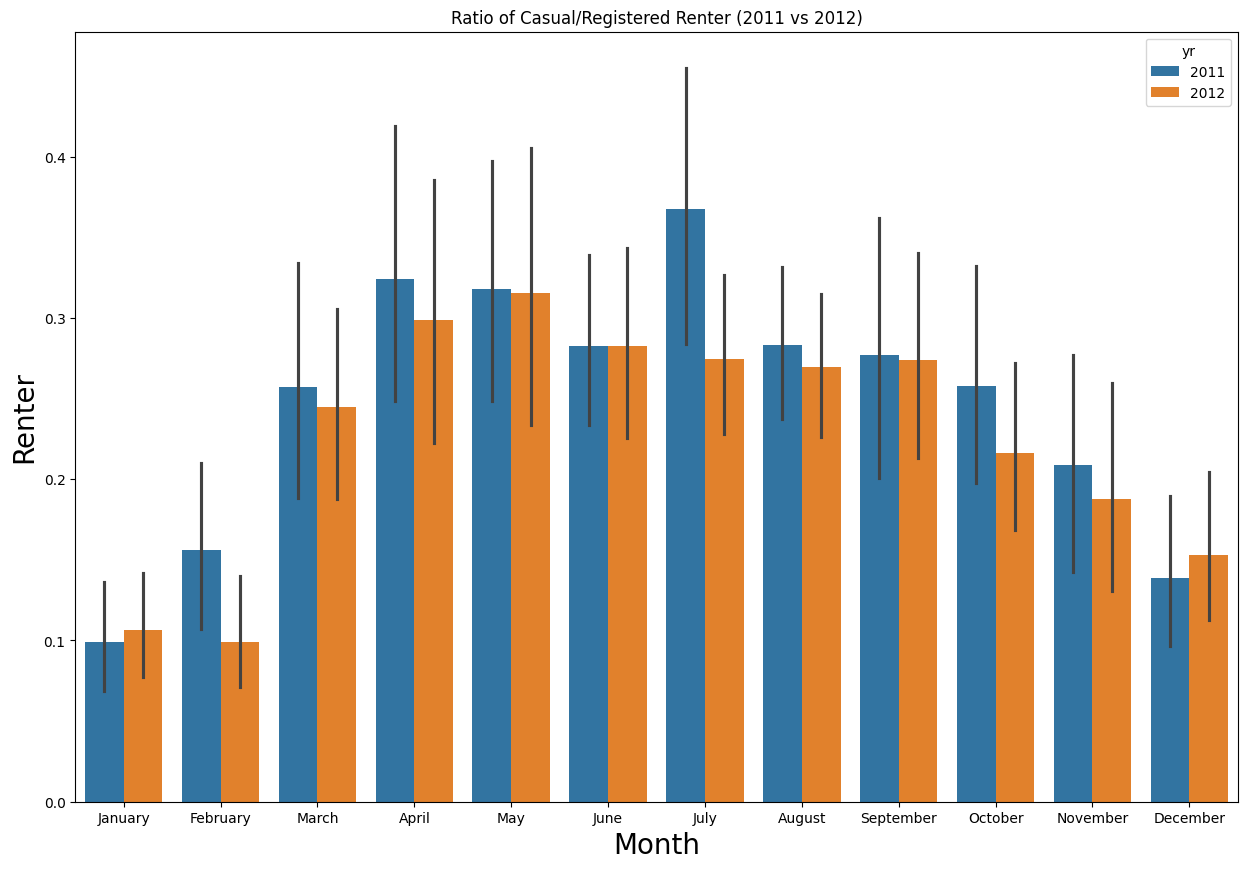

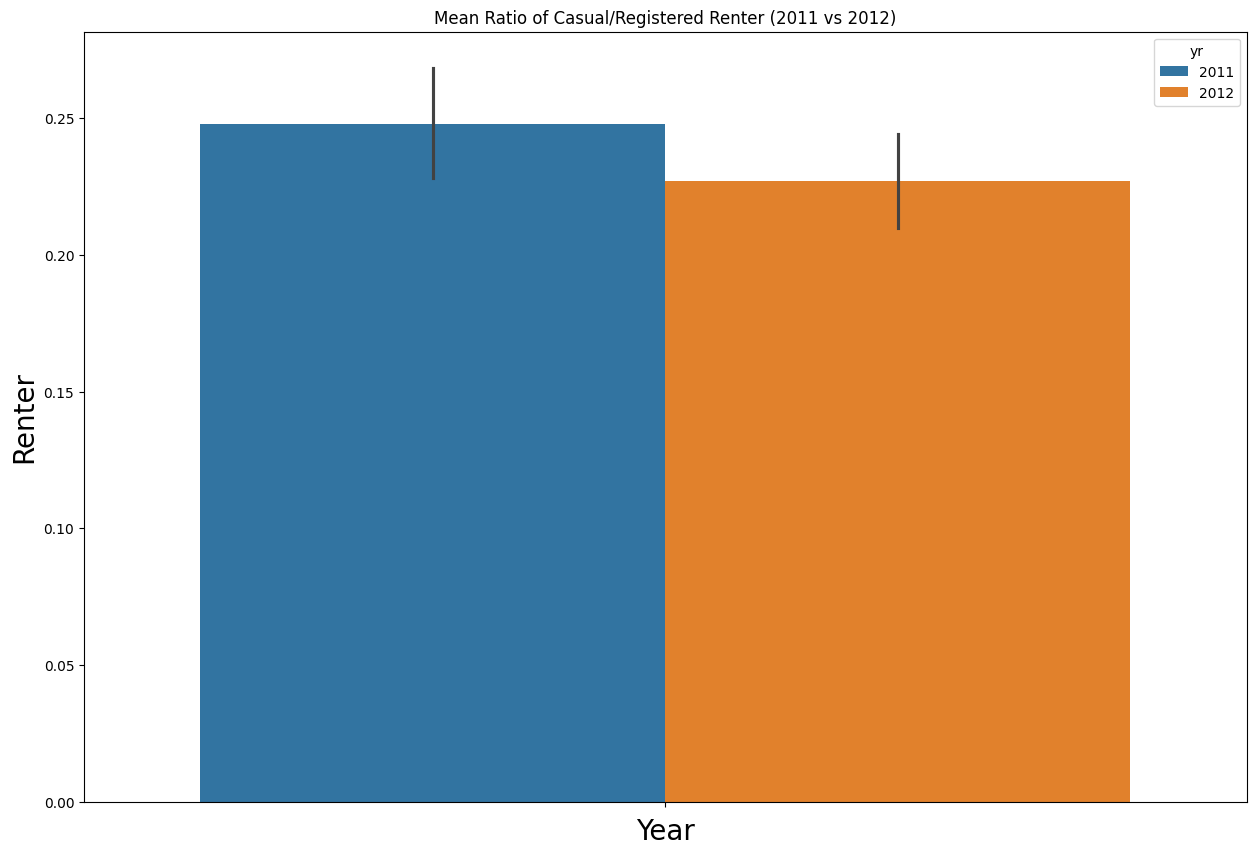

In [101]:
df_day_clean["casual/registered"] = df_day_clean["casual"] / df_day_clean["registered"]

plt.figure(figsize=(15, 10))
sns.barplot(df_day_clean, x="mnth", y="casual/registered", hue="yr")
plt.ylabel("Renter", fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.title("Ratio of Casual/Registered Renter (2011 vs 2012)")
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(df_day_clean[["casual/registered","yr"]],
            y="casual/registered", hue="yr")
plt.ylabel("Renter", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Mean Ratio of Casual/Registered Renter (2011 vs 2012)")
plt.show()

**Insight:**

- Jika dirasiokan antara casual dan registered renter, maka dapat dilihat perbandingan tahun 2011 dan 2012 rasionya menurun. Hal ini dapat menunjukkan pergerakkan casual renter menjadi member.

## Conclusion

Pertanyaan:<br>
1. Pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit ? <br>
2. Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ? <br>
3. Pada musim apa penyewaan sepeda paling banyak dan paling sedikit ? <br>
4. Bagaimana perbandingan data penyewaan Tahun 2011 dan 2012 ? <br>
5. Bagaimana perbandingan data penyewaan pelanggan Casual dan Registered ? <br>

**Conclution:**
1. Hari dengan jumlah penyewa paling banyak adalah hari Jumat, Hari dengan jumlah penyewa paling sedikit adalah Hari Minggu. Kemungkinan hari minggu digunakan sebagai hari beristirahat sehingga orang - orang tidak melakukan aktifitas diluar ruangan. Sementara pada hari Jumat merupakan hari terakhir bekerja sebelum libur pada sabtunya, terjadinya puncak jumlah penyewaan sepeda dapat disebabkan bercampurnya penyewa sepeda untuk keperluan mobilitas bekerja dengan penyewa sepeda untuk berwisata.

2. Berikut konklusi untuk pertanyaan No. 2:
- Berdasarkan jam, Pukul 5 sore merupakan waktu jumlah penyewaan terbanyak sedangkan Pukul 4 pagi merupakan jumlah penyewaan paling sedikit.
- Terjadinya lonjakan penyewaan pada Pukul 8 pagi dapat disebabkan karena kebutuhan orang untuk mobilitas berangkat kerja dimana kemungkinan masuk kerja pada Pukul 9.
- Sedangkan Pukul 5 sore diduga merupakan waktu bercampurnya penyewa untuk keperluan mobilitas dalam bekerja dan penyewa untuk keperluan rekreasi.
- Di lain hal setelah pukul 5 sore jumlah penyewa konsisten menurun hingga pukul 4 pagi.

3. Jumlah penyewaan rata - rata paling sedikit terjadi pada musim Springer dan paling banyak pada Fall

4. Terjadi peningkatan jumlah penyewaan yang signifikan pada tahun 2011 ke tahun 2012.

5. Berikut konklusi untuk pertanyaan No. 5:

- Jumlah penyewa yang terdaftar konsisten lebih banyak daripada jumlah penyewa casual. Hal ini menunjukkan banyaknya orang yang rutin menyewa sepeda dimana diduga untuk keperluan mobilitas pekerjaan.
- Jika dirasiokan antara casual dan registered renter, maka dapat dilihat perbandingan tahun 2011 dan 2012 rasionya menurun. Hal ini dapat menunjukkan pergerakkan casual renter menjadi member.


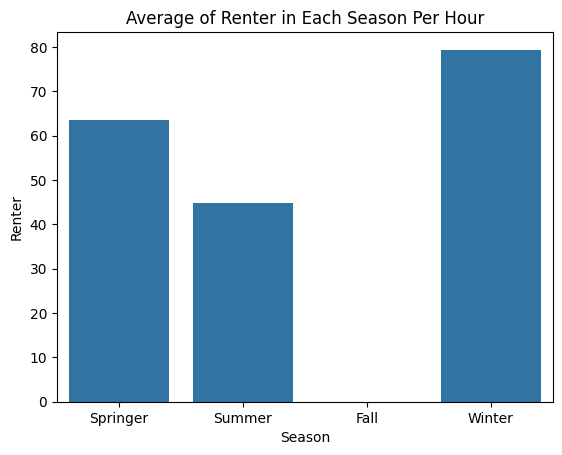

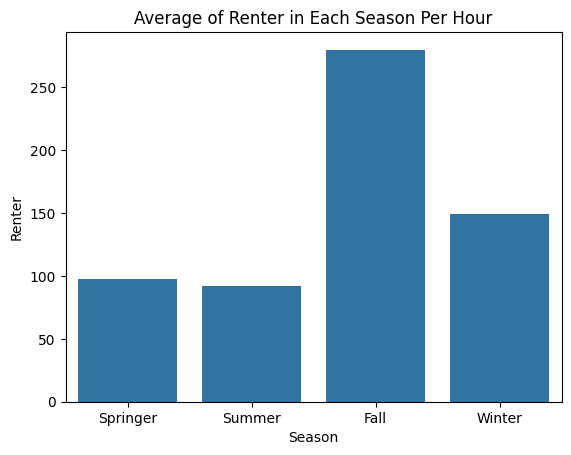

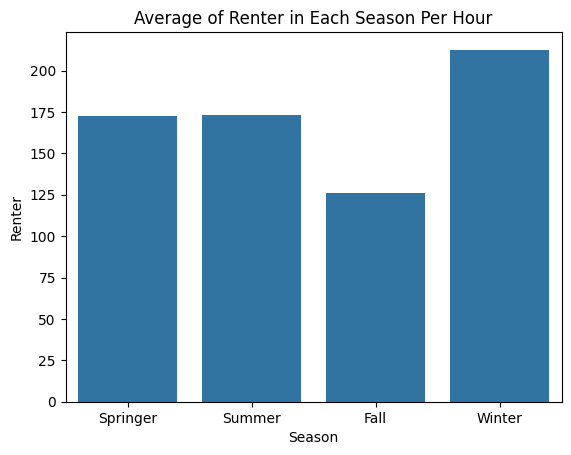

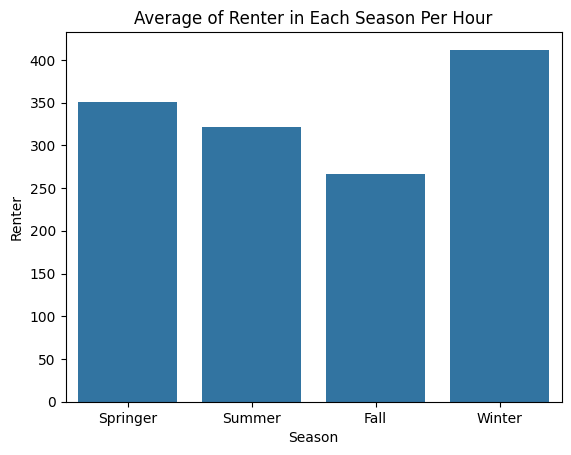

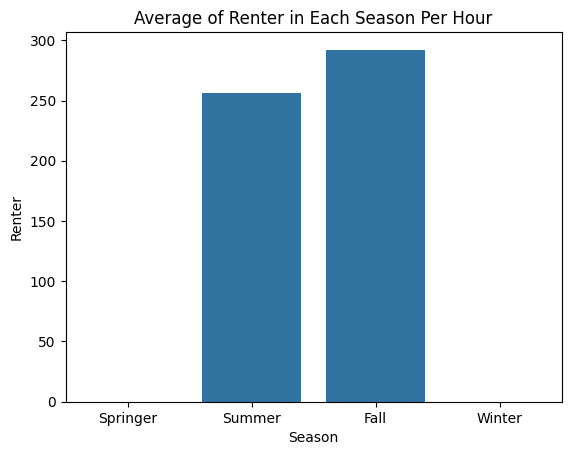

In [102]:
plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp >= 0) & (df_hour_clean.atemp <= 0.20)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.20) & (df_hour_clean.atemp <= 0.40)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.40) & (df_hour_clean.atemp <= 0.60)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.60) & (df_hour_clean.atemp <= 0.80)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.80) & (df_hour_clean.atemp <= 1.00)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

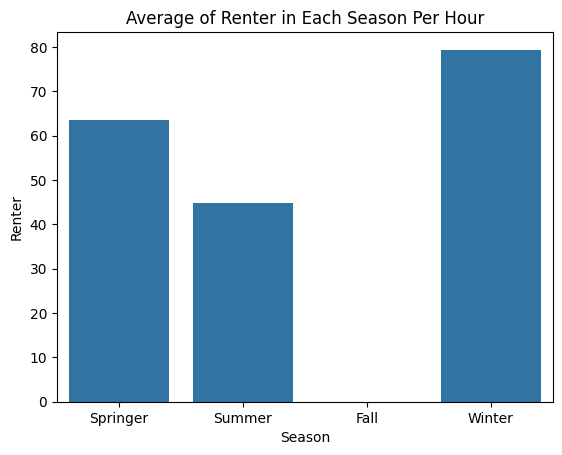

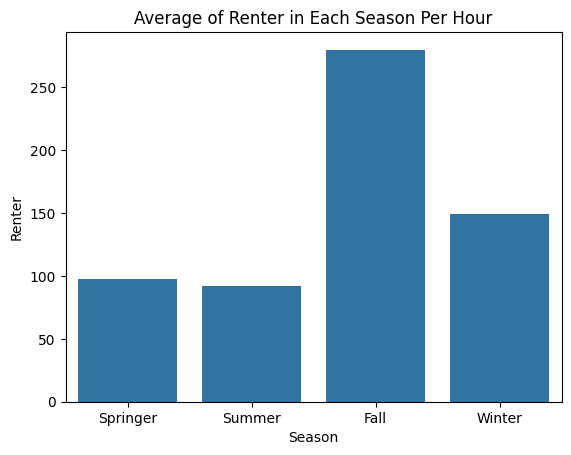

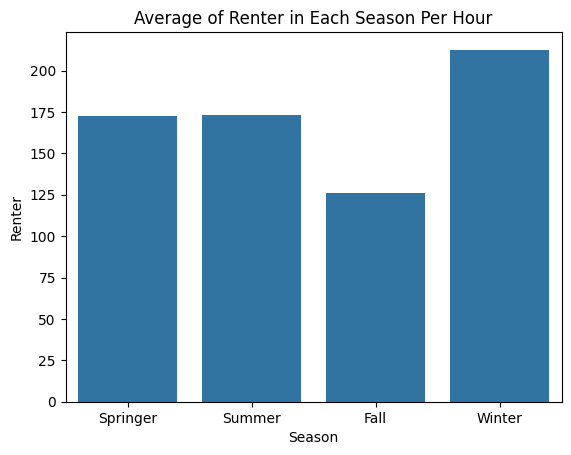

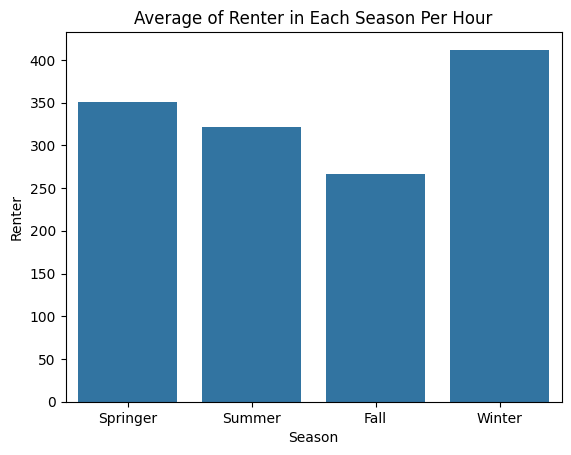

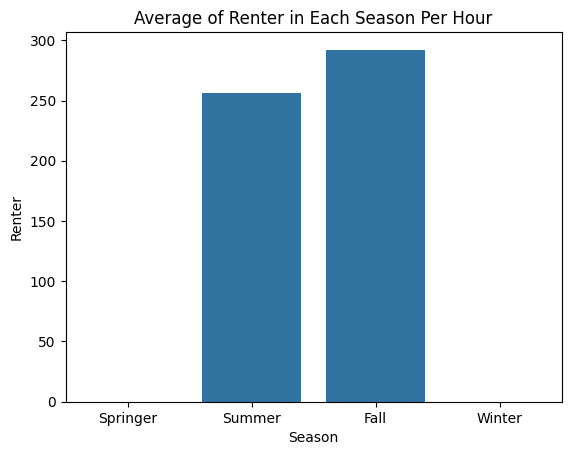

In [103]:
plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp >= 0) & (df_hour_clean.atemp <= 0.20)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.20) & (df_hour_clean.atemp <= 0.40)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.40) & (df_hour_clean.atemp <= 0.60)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.60) & (df_hour_clean.atemp <= 0.80)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour")
sns.barplot(df_hour_clean[(df_hour_clean.atemp > 0.80) & (df_hour_clean.atemp <= 1.00)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

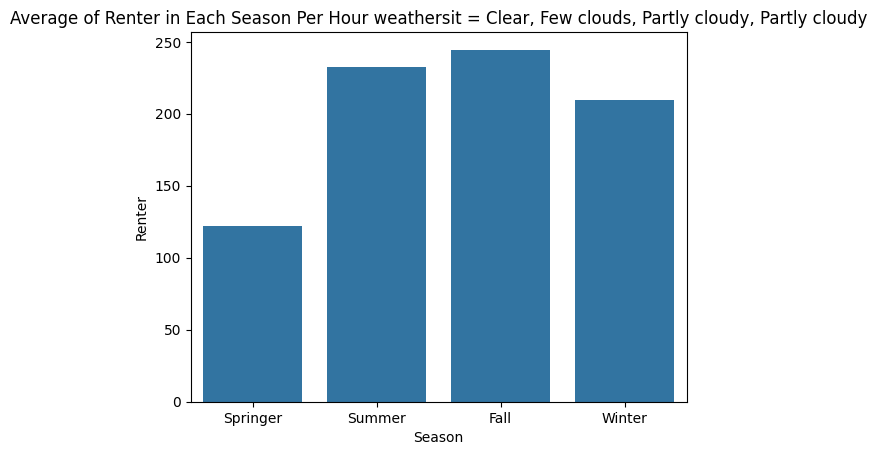

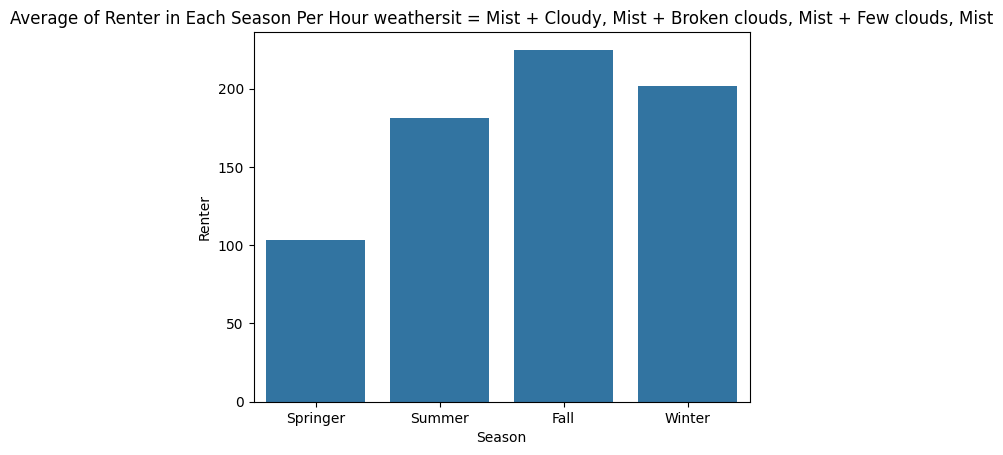

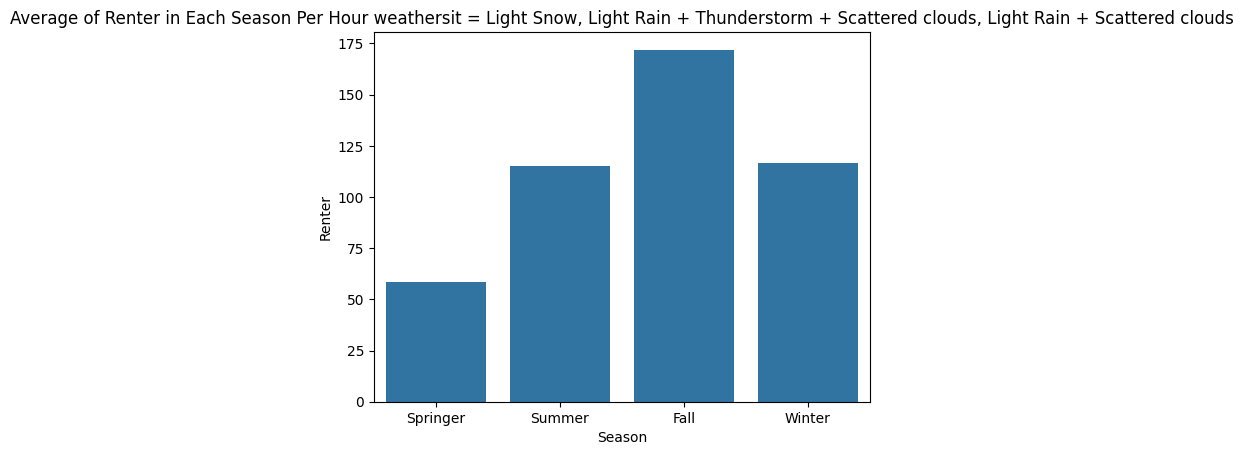

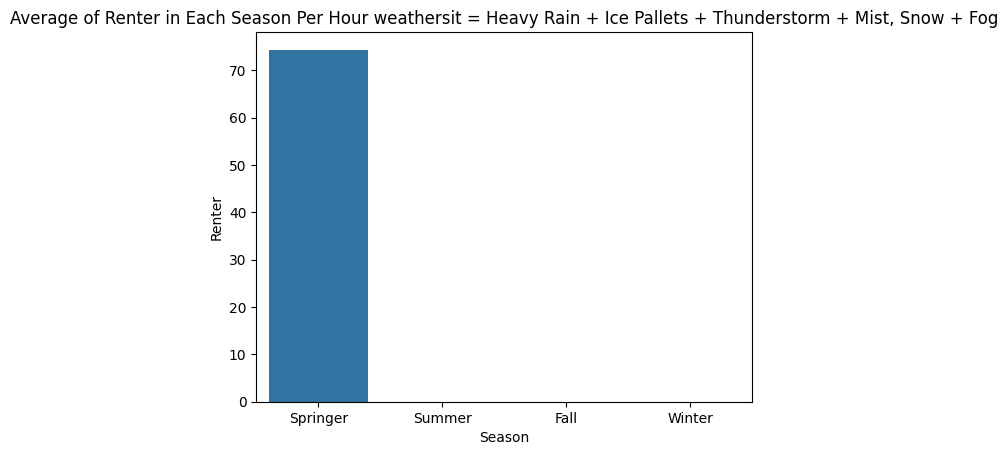

In [104]:
arr = df_hour_clean.weathersit.unique()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour weathersit = {}".format(arr[0]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[0]].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour weathersit = {}".format(arr[1]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[1]].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour weathersit = {}".format(arr[2]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[2]].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour weathersit = {}".format(arr[3]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[3]].groupby(by="season", observed=False)['cnt'].mean())
plt.show()


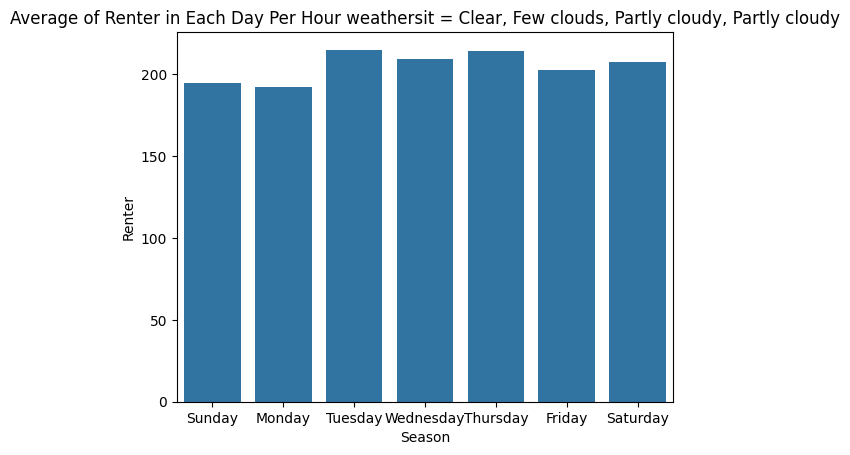

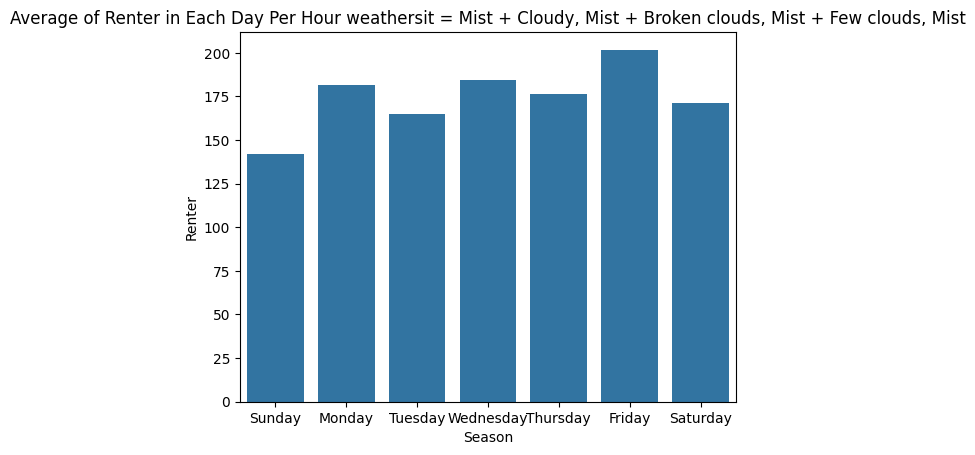

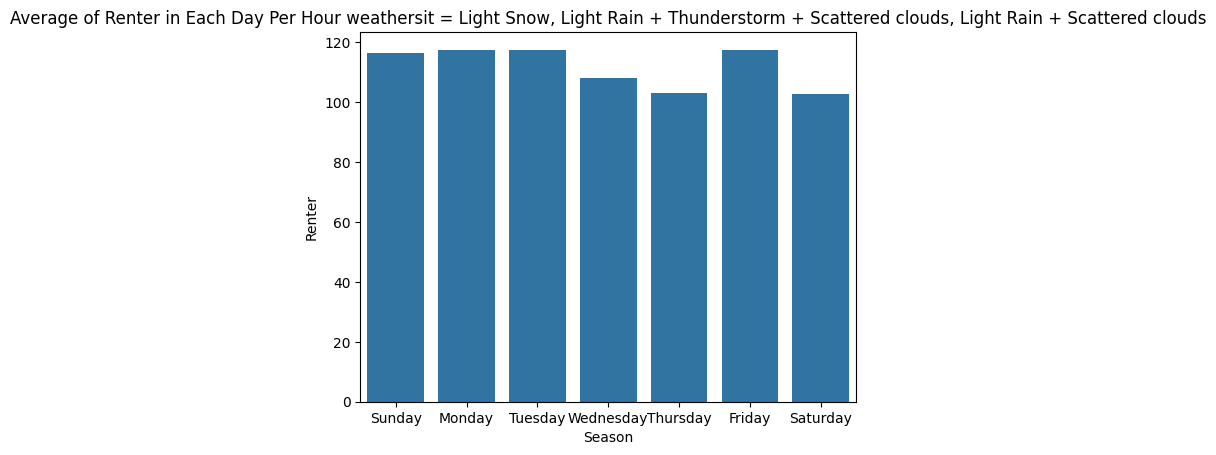

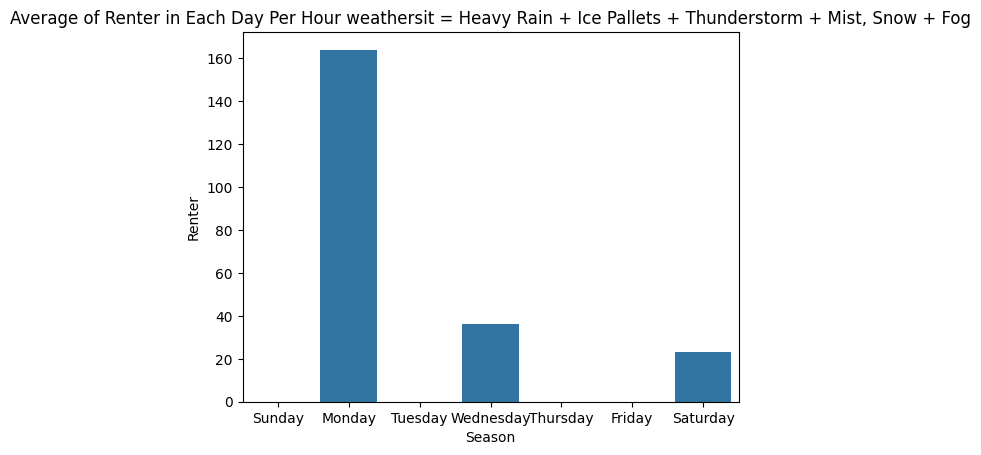

In [105]:
arr = df_hour_clean.weathersit.unique()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Day Per Hour weathersit = {}".format(arr[0]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[0]].groupby(by="weekday", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Day Per Hour weathersit = {}".format(arr[1]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[1]].groupby(by="weekday", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Day Per Hour weathersit = {}".format(arr[2]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[2]].groupby(by="weekday", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Day Per Hour weathersit = {}".format(arr[3]))
sns.barplot(df_hour_clean[df_hour_clean.weathersit == arr[3]].groupby(by="weekday", observed=False)['cnt'].mean())
plt.show()


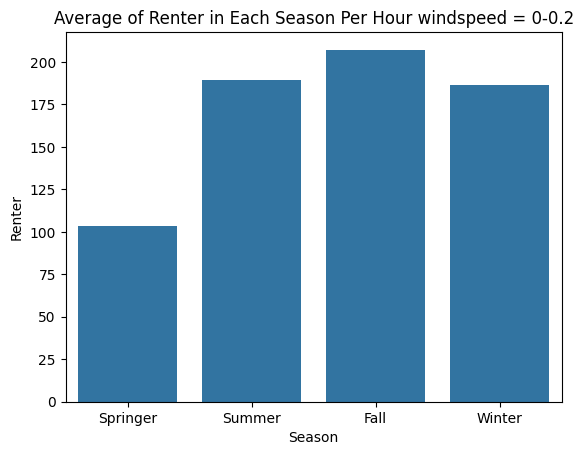

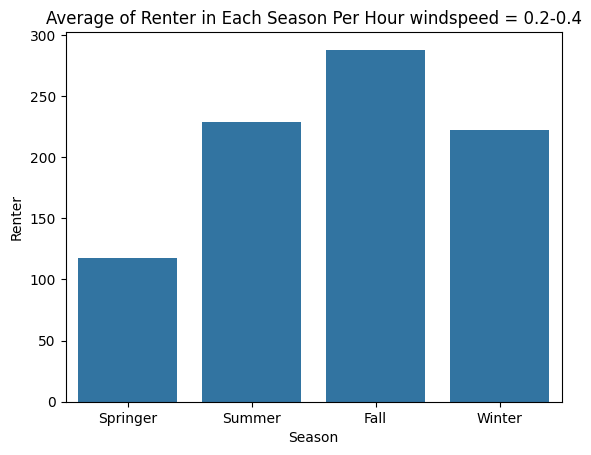

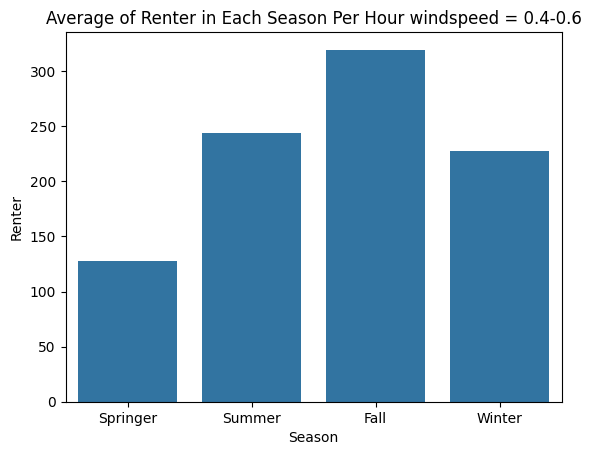

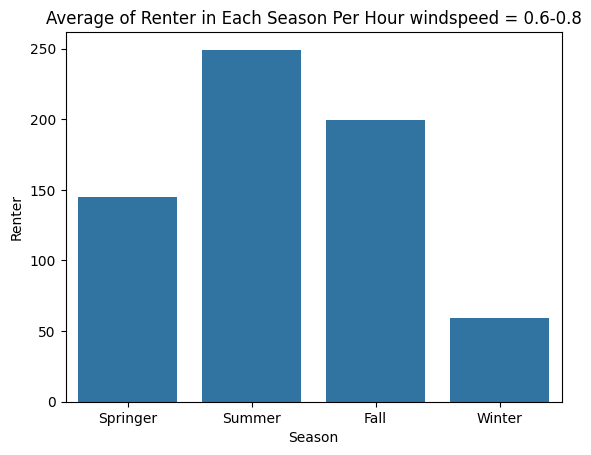

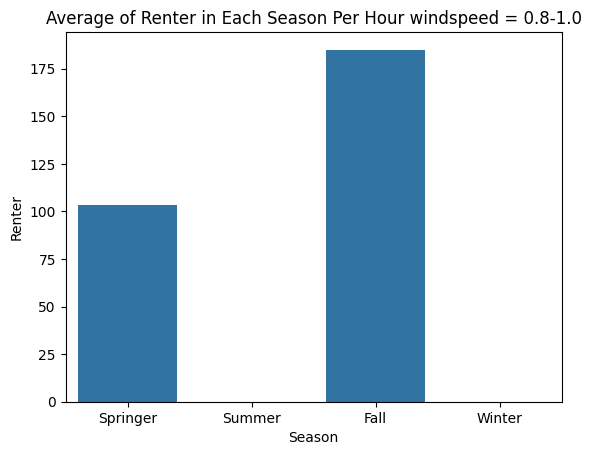

In [106]:
arr = df_hour_clean.weathersit.unique()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour windspeed = {}-{}".format(0, 0.2))
sns.barplot(df_hour_clean[(df_hour_clean.windspeed >=0) &
                          (df_hour_clean.windspeed <=0.20)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour windspeed = {}-{}".format(0.2, 0.4))
sns.barplot(df_hour_clean[(df_hour_clean.windspeed > 0.20) &
                          (df_hour_clean.windspeed <=0.40)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour windspeed = {}-{}".format(0.4, 0.6))
sns.barplot(df_hour_clean[(df_hour_clean.windspeed > 0.40) &
                          (df_hour_clean.windspeed <=0.60)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour windspeed = {}-{}".format(0.6, 0.8))
sns.barplot(df_hour_clean[(df_hour_clean.windspeed > 0.60) &
                          (df_hour_clean.windspeed <=0.80)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()

plt.xlabel("Season")
plt.ylabel("Renter")
plt.title("Average of Renter in Each Season Per Hour windspeed = {}-{}".format(0.8, 1.0))
sns.barplot(df_hour_clean[(df_hour_clean.windspeed > 0.80) &
                          (df_hour_clean.windspeed <=1.00)].groupby(by="season", observed=False)['cnt'].mean())
plt.show()


## Teknik Analisis Lanjutan

### 1. Analisis Clustering

#### Total Pengguna Berdasarkan Hari Kerja dan Jam

workingday  hr
No          0      90.800000
            1      69.508696
            2      53.171053
            3      25.775330
            4       8.264317
            5       8.689189
            6      18.742358
            7      43.406926
            8     105.653680
            9     171.623377
            10    255.909091
            11    315.316017
            12    366.259740
            13    372.731602
            14    364.645022
            15    358.813853
            16    352.727273
            17    323.549784
            18    281.056522
            19    231.673913
            20    174.739130
            21    142.060870
            22    116.060870
            23     85.930435
Yes         0      36.786290
            1      16.552632
            2       8.683778
            3       4.942553
            4       5.429787
            5      24.913131
            6     102.500000
            7     290.612903
            8     477.006048
            9     241.518145
            10    135.366935
            11    158.229839
            12    200.820926
            13    198.429719
            14    183.572289
            15    201.331325
            16    293.122244
            17    525.290581
            18    492.226908
            19    348.401606
            20    249.718876
            21    186.287149
            22    138.389558
            23     88.708835
Name: cnt, dtype: float64

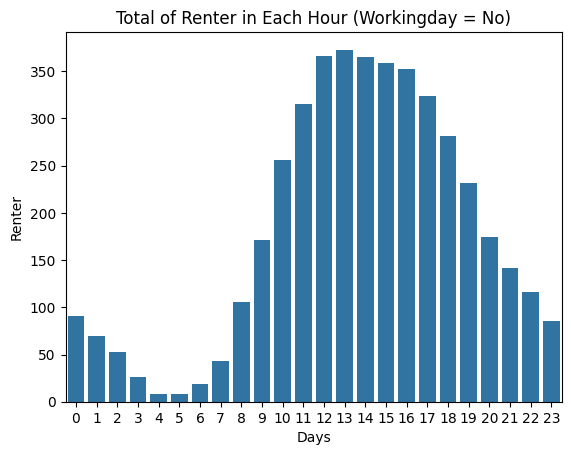

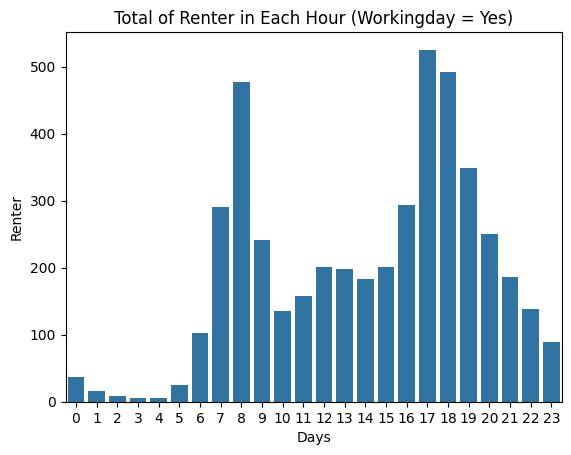

In [107]:
display(df_hour_clean.groupby(by=["workingday","hr"],observed=False)['cnt'].mean())

plt.xlabel("Days")
plt.ylabel("Renter")
plt.title("Total of Renter in Each Hour (Workingday = No)")
sns.barplot(df_hour_clean[df_hour_clean.workingday == "No"].
                          groupby(by="hr",observed=False)['cnt'].mean().sort_values(ascending=False))
plt.show()
plt.xlabel("Days")
plt.ylabel("Renter")
plt.title("Total of Renter in Each Hour (Workingday = Yes)")
sns.barplot(df_hour_clean[df_hour_clean.workingday == "Yes"].
                          groupby(by="hr",observed=False)['cnt'].mean().sort_values(ascending=False))

plt.show()

**Insight:**
Dapat dilihat ketika hari libur (workingday = No) jumlah rata - rata penyewaan antara jam 9 - 16 lebih besar dibandingkan jika hari kerja. Dimana hal ini menunjukkan banyaknya orang menyewa sepeda untuk rekreasi ketika jam tersebut.

#### Rata - Rata Pengguna Berdasarkan Kategori Suhu Per Jam

,cnt
Atemp Category,
Extremely High,287.034130
High,178.682421
Low,63.590278
Medium,116.285944
Very High,292.069394


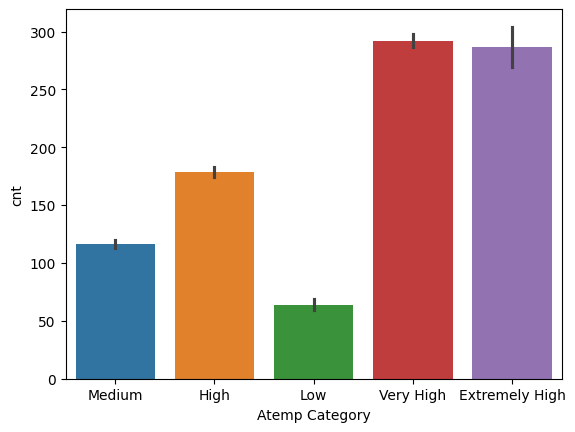

In [108]:
df_hour_clean.loc[(df_hour_clean.atemp >= 0) & (df_hour_clean.atemp <= 0.20), "Atemp Category"] = "Low"
df_hour_clean.loc[(df_hour_clean.atemp > 0.20) & (df_hour_clean.atemp <= 0.40), "Atemp Category"] = "Medium"
df_hour_clean.loc[(df_hour_clean.atemp > 0.40) & (df_hour_clean.atemp <= 0.60), "Atemp Category"] = "High"
df_hour_clean.loc[(df_hour_clean.atemp > 0.60) & (df_hour_clean.atemp <= 0.80), "Atemp Category"] = "Very High"
df_hour_clean.loc[(df_hour_clean.atemp > 0.80) & (df_hour_clean.atemp <= 1.00), "Atemp Category"] = "Extremely High"

display(df_hour_clean.groupby(by="Atemp Category",observed=False)['cnt'].mean())
sns.barplot(df_hour_clean, x="Atemp Category", y="cnt", hue="Atemp Category")
plt.show()

**Insight:**
Terlihat bahwa orang enggan bersepeda pada suhu rendah

#### Rata - rata pengguna Berdasarkan Kategori Kecepatan Angin Per Jam

,cnt
Windspeed Category,
Extremely High,152.400000
High,201.554069
Low,175.005431
Medium,212.443098
Very High,156.500000


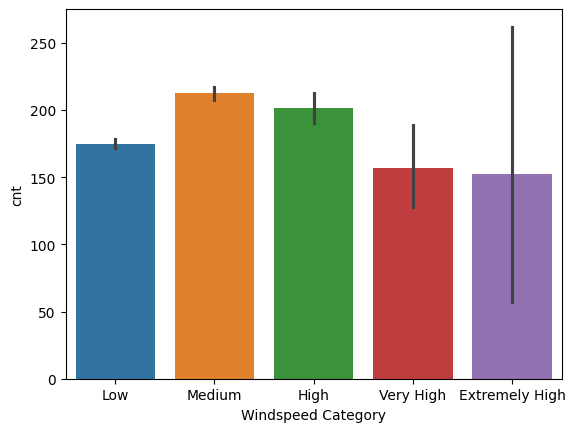

In [109]:
df_hour_clean.loc[(df_hour_clean.windspeed >= 0) & (df_hour_clean.windspeed <= 0.20), "Windspeed Category"] = "Low"
df_hour_clean.loc[(df_hour_clean.windspeed > 0.20) & (df_hour_clean.windspeed <= 0.40), "Windspeed Category"] = "Medium"
df_hour_clean.loc[(df_hour_clean.windspeed > 0.40) & (df_hour_clean.windspeed <= 0.60), "Windspeed Category"] = "High"
df_hour_clean.loc[(df_hour_clean.windspeed > 0.60) & (df_hour_clean.windspeed <= 0.80), "Windspeed Category"] = "Very High"
df_hour_clean.loc[(df_hour_clean.windspeed > 0.80) & (df_hour_clean.windspeed <= 1.00), "Windspeed Category"] = "Extremely High"

display(df_hour_clean.groupby(by="Windspeed Category",observed=False)['cnt'].mean())
sns.barplot(df_hour_clean, x="Windspeed Category", y="cnt", hue="Windspeed Category")
plt.show()


**Insight:** orang relatif enggan untuk bersepeda ketika kecepatan angin yang terlalu tinggi atau terlalu rendah

#### Rata - Rata Pengguna Berdasarkan Kategori Humidity Per Jam

,cnt
Hum Category,
Extremely High,107.244204
High,221.745683
Low,225.947368
Medium,288.105285
Very High,172.896888


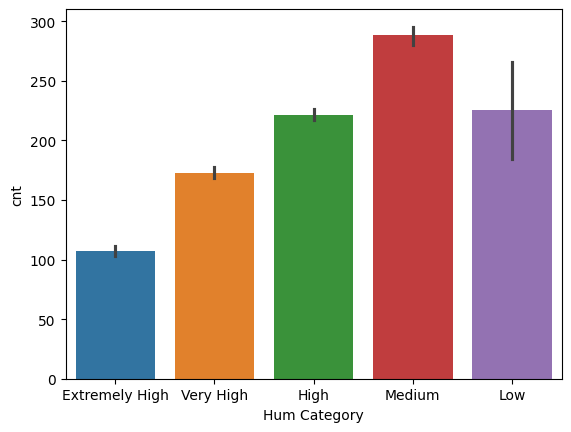

In [110]:
df_hour_clean.loc[(df_hour_clean.hum >= 0) & (df_hour_clean.hum <= 0.20), "Hum Category"] = "Low"
df_hour_clean.loc[(df_hour_clean.hum > 0.20) & (df_hour_clean.hum <= 0.40), "Hum Category"] = "Medium"
df_hour_clean.loc[(df_hour_clean.hum > 0.40) & (df_hour_clean.hum <= 0.60), "Hum Category"] = "High"
df_hour_clean.loc[(df_hour_clean.hum > 0.60) & (df_hour_clean.hum <= 0.80), "Hum Category"] = "Very High"
df_hour_clean.loc[(df_hour_clean.hum > 0.80) & (df_hour_clean.hum <= 1.00), "Hum Category"] = "Extremely High"

display(df_hour_clean.groupby(by="Hum Category",observed=False)['cnt'].mean())
sns.barplot(df_hour_clean, x="Hum Category", y="cnt", hue="Hum Category")
plt.show()


**Insight:** Ketika humidity semakin tinggi maka keinginan bersepeda orang - orang semakin rendah, tetapi ketika humidity juga terlalu rendah maka relatif orang - orang juga lebih memilih tidak bersepeda

In [111]:
display(df_hour_clean.groupby(by="weathersit",observed=False)['cnt'].mean())

,cnt
weathersit,
"Clear, Few clouds, Partly cloudy, Partly cloudy",204.869272
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",175.165493
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",111.579281
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",74.333333


**Insight:** Rata - rata penyewaan sepeda terbanyak ketika hari yang sangat cerah